# Compare SWAN Models w/ Different Dissipation Parameters

This python notebook is created by Fatih Bahri AYDIN who is Msc. Civil Engineer from Gebze Technical University in 13.08.2023

The codes below open the result excel file which contains SWAN model results and compare model result and observation values. Save charts of Hs, Tp and spectral density in shallowest (or other) sensor locations.

This file is a part of F. Bahri AYDIN's Msc. Thesis and TUBITAK (Scientific and Technical Research Council of Turkey) international project code:119N400

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
class Compare_Models_Outputs(object):
    def create_df(self, model0, type_dir, for_loop_C):
        self.model0 = model0
        self.type_dir = type_dir
        self.for_loop_C = for_loop_C
        self.df = pd.read_excel(os.path.join(self.type_dir,self.model0[self.for_loop_C]) +
                      "\\" + self.model0[self.for_loop_C][6:] + "_Default_Model_Results.xlsx")
        return self.model0
    def Hm0(self, savedir, savefig=False):
        self.savefig = savefig
        self.savedir = savedir
        #Define significant wave height for SWAN and observations
        self.Hm0_SWAN = self.df.iloc[5:6, 4:19].values.flatten().astype('float64')
        self.Hm0_OBS = self.df.iloc[59:60, 4:19].values.flatten().astype('float64')
        #Define figure
        plt.figure(figsize=(12, 6))
        plt.plot(np.arange(1, len(self.Hm0_OBS)+1), self.Hm0_OBS, label='Obs.', marker='*')
        plt.plot(np.arange(1, len(self.Hm0_SWAN)+1), self.Hm0_SWAN, label='SWAN', marker='<')
        plt.legend(loc='best')
        plt.title('Wave Height of model ' + str(self.model0[self.for_loop_C][6:]) + ' (' + self.type_dir[86:] + ')') # 3 yerine i,j,k gibi döngü parametresi gelecek.
        plt.xlabel("Location")
        plt.xlim(1,15)
        plt.ylabel("Wave Heigth(m)")
        plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.25)
        plt.xticks(np.arange(1, 16, step=1))
        #If you want to save figure
        if self.savefig:
            plt.savefig(self.savedir + "_" +  self.type_dir[86:] + 'Hs_plot.png')
        plt.show()
    def T02(self, savedir, savefig=False):
        self.savefig = savefig
        self.savedir = savedir
        #Define peak periods for SWAN and observations
        self.T02_SWAN = self.df.iloc[4:5, 4:19].values.flatten().astype('float64')
        self.T02_OBS = self.df.iloc[58:59, 4:19].values.flatten().astype('float64')
        #Define figure
        plt.figure(figsize=(12, 6))
        plt.plot(np.arange(1, len(self.T02_OBS)+1), self.T02_OBS, label='Obs.', marker='v')
        plt.plot(np.arange(1, len(self.T02_SWAN)+1), self.T02_SWAN, label='SWAN', marker='s')
        plt.legend(loc='best')
        plt.title('Peak Periods of model ' + str(self.model0[self.for_loop_C][6:]) + ' (' + self.type_dir[86:] + ')') # models0[0] 0 yerine i,j,k gibi döngü parametresi gelecek.
        plt.xlabel("Location")
        plt.xlim(1,15)
        plt.ylabel("Periods(s)")
        plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.25)
        plt.xticks(np.arange(1, 16, step=1))
        #If you want to save figure
        if self.savefig:
            plt.savefig(self.savedir + "_" +  self.type_dir[86:] + 'Tp_plot.png')
        plt.show()
    def spectra(self, savedir, savefig=False):
        self.savefig = savefig
        self.savedir = savedir
        # Define series of spectrums
        self.freq_SWAN = self.df.iloc[13:52, 3:4].values.flatten().astype('float64') #buradaki 3:4'teki 3 yerine i,j,k gibi döngü parametresi gelecek
        self.dens_SWAN = self.df.iloc[13:52, 4:5].values.flatten().astype('float64')
        self.freq_OBS = self.df.iloc[67:268, 3:4].values.flatten().astype('float64')
        self.dens_OBS = self.df.iloc[67:268, 4:5].values.flatten().astype('float64')
        #Define figure and axis
        self.fig, self.ax = plt.subplots(figsize=(12, 6))
        #Define plots
        self.ax.plot(self.freq_SWAN, self.dens_SWAN, label='SWAN')
        self.ax.plot(self.freq_OBS, self.dens_OBS, label='Obs.')
        #Define maximum value of density and its frequency value (for SWAN)
        self.max_dens = max(self.dens_SWAN)
        try:
            self.idx = np.where(self.dens_SWAN == self.max_dens)[0][0]
            self.freq_max_dens = self.freq_SWAN[self.idx]
        except:
            pass
        else:
            self.th1 = plt.text(self.freq_max_dens + 0.05*self.freq_max_dens , self.max_dens, s='peak dens = ' + str(self.max_dens), fontsize = 8, rotation = 0)
            plt.ylim(0, self.max_dens + 0.05*self.max_dens)
        finally:
            plt.xlim(0,1)
            plt.title('Spectrum of model ' + str(self.model0[self.for_loop_C][6:]) + ' at Location ' + str(3-2) + ' (' + self.type_dir[86:] + ')') # 3 yerine i,j,k gibi döngü parametresi gelecek.
            plt.xlabel("Frequency(Hz)")
            plt.ylabel("Density (m^2/Hz)")
            plt.legend(loc='best')
            #If you want to save figure
            if self.savefig:
                plt.savefig(self.savedir + "_" +  self.type_dir[86:] + ' Location ' + str(3-2) + 'Spectra_plot.png')
            plt.show()

In [3]:
my_dir = r"C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik Üniversitesi\Tez\Proje\13 Aug MODELS" # Define the directory of models.
save_dir = r"C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik Üniversitesi\Tez\Proje\Plots_13Aug" # Choose a directory to save charts.

In [4]:
os.chdir(my_dir)
model_types = os.listdir()

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


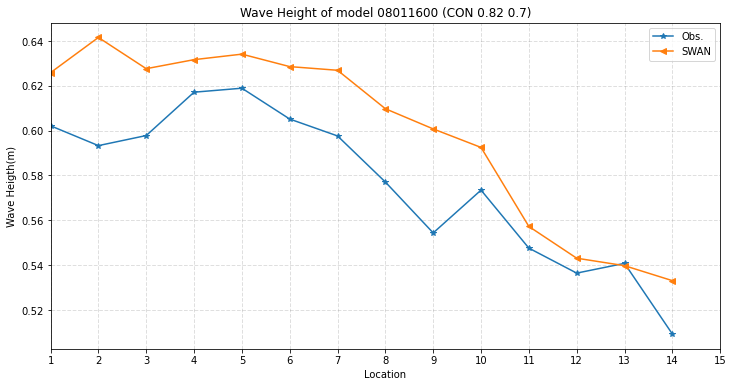

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


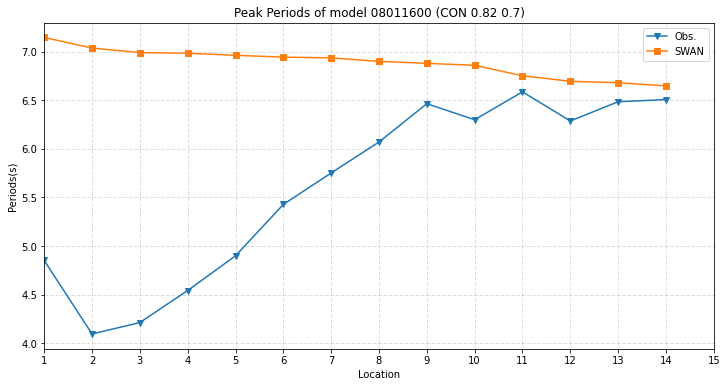

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


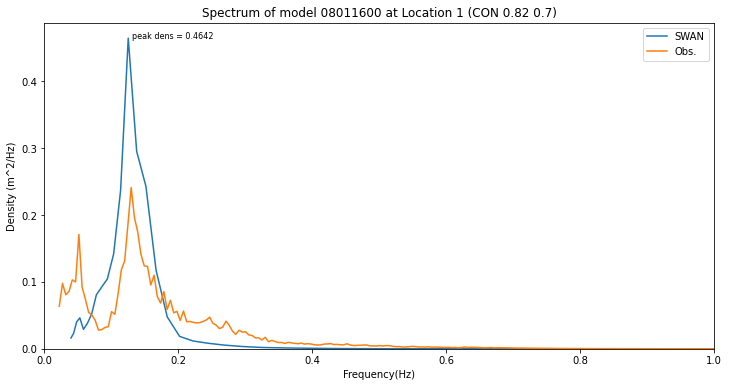

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


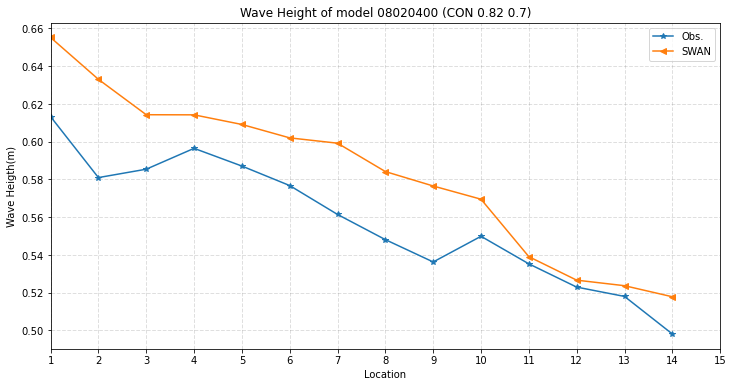

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


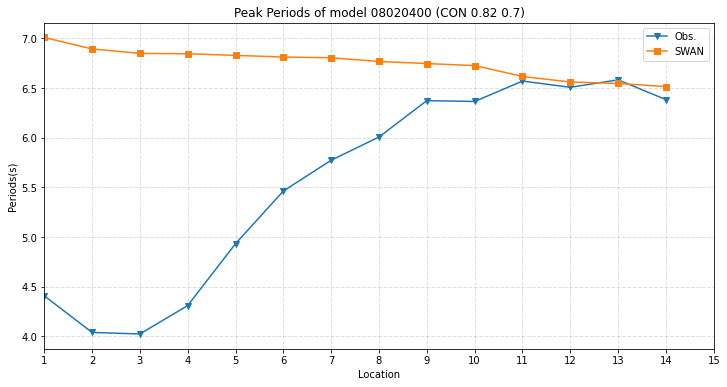

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


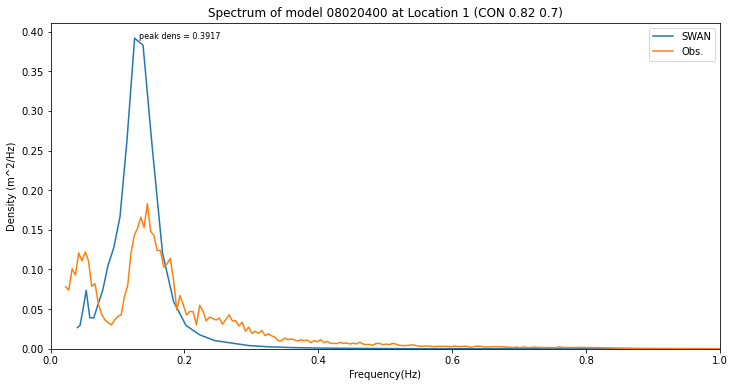

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


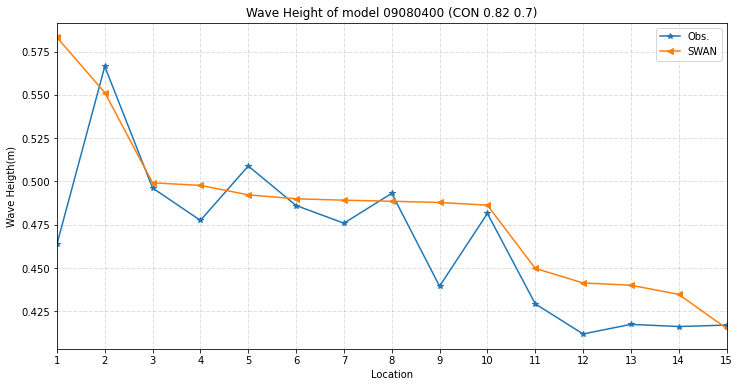

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


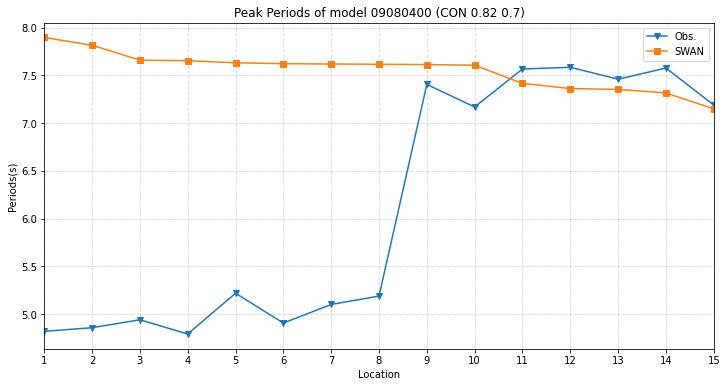

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


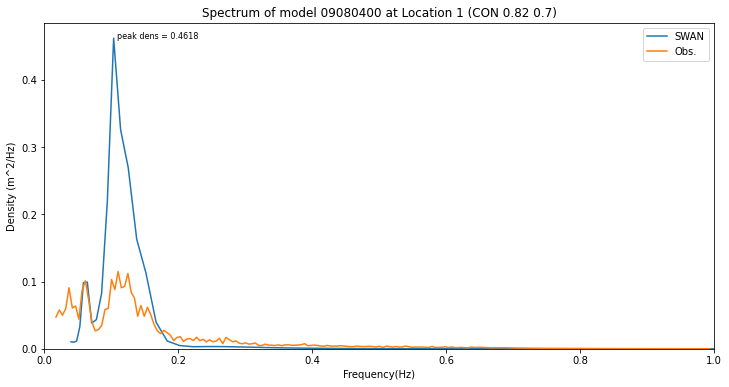

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


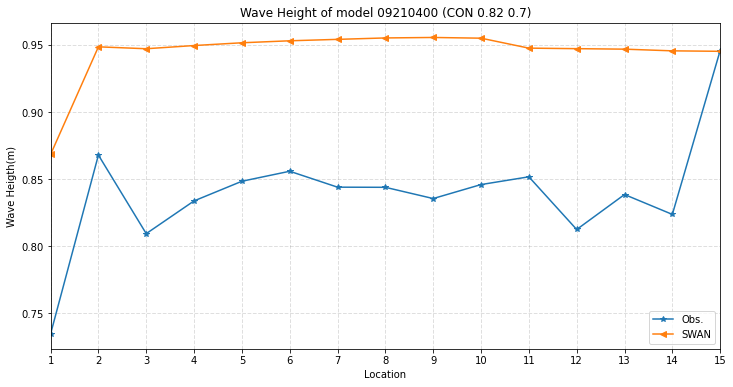

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


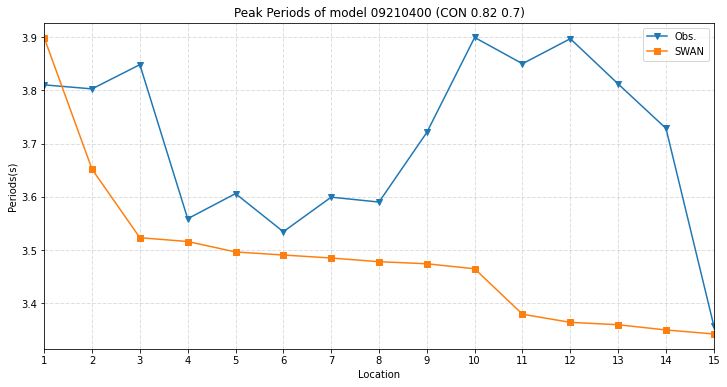

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


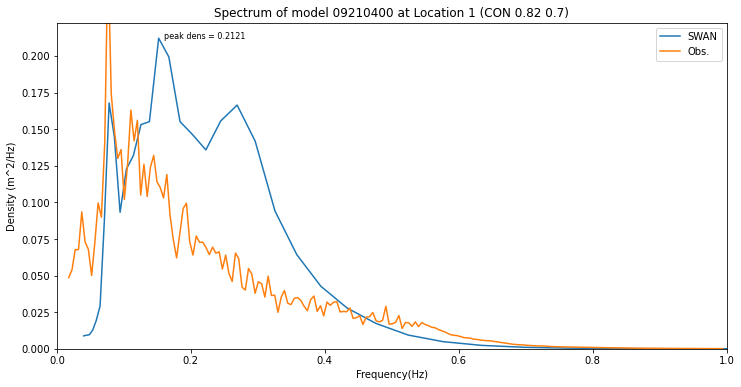

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


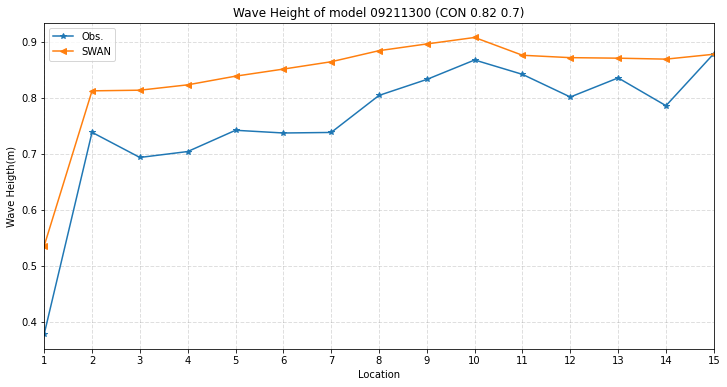

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


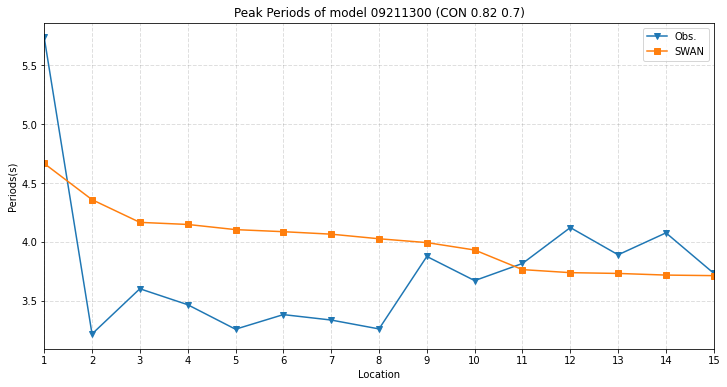

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


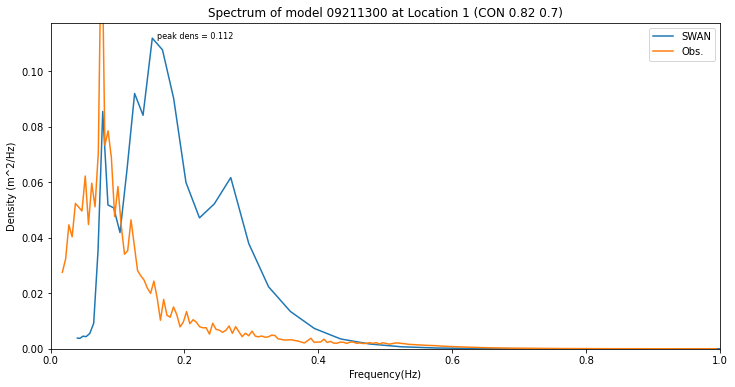

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


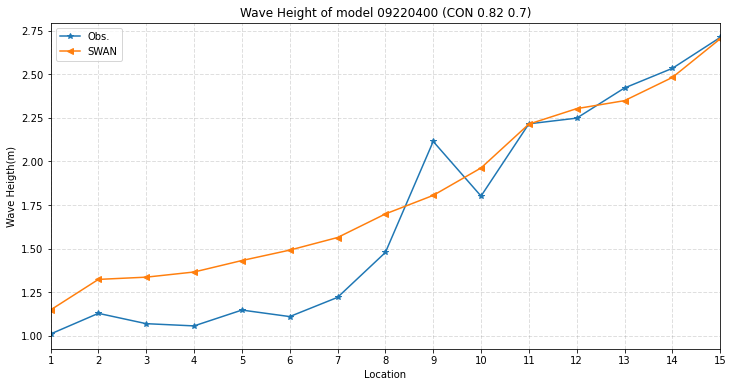

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


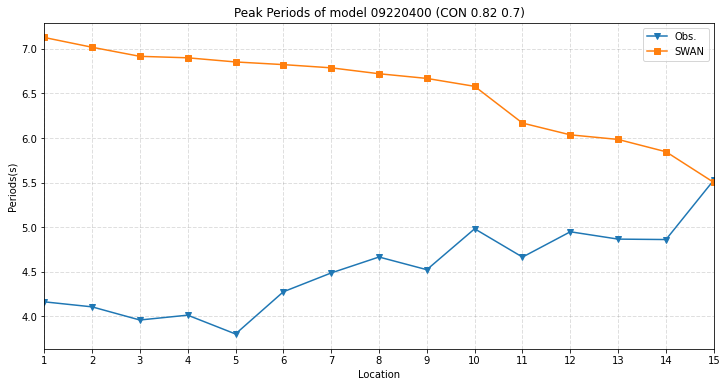

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


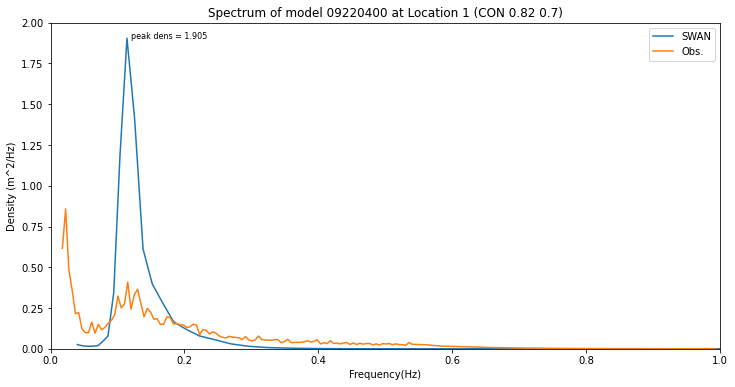

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


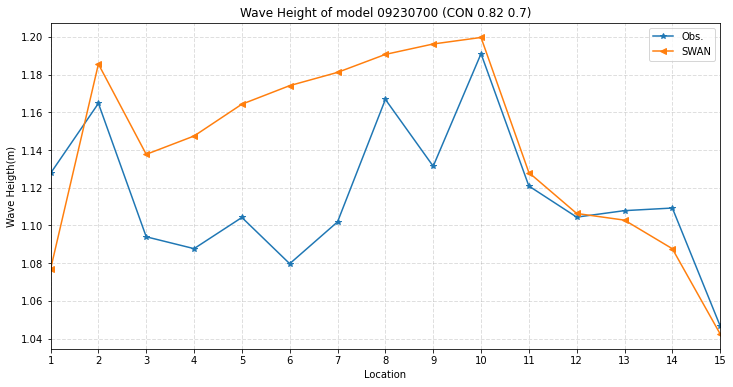

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


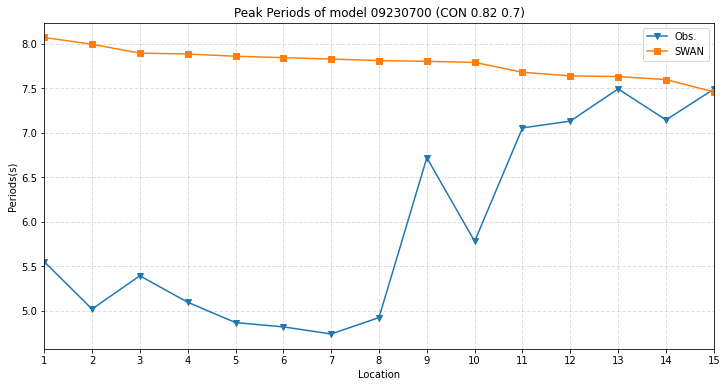

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


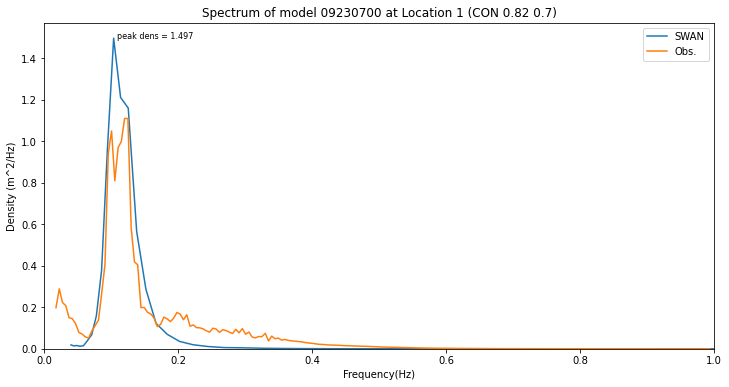

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


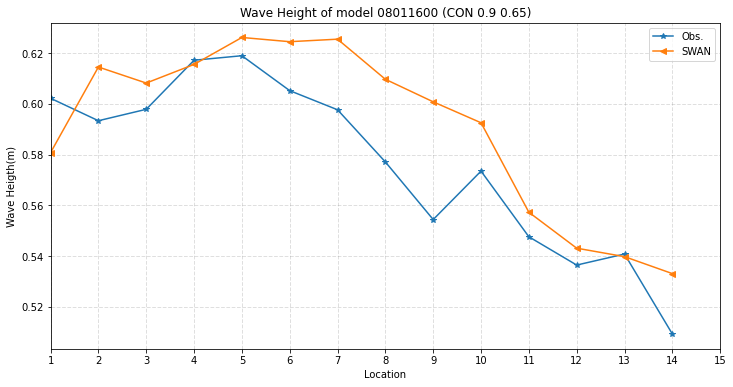

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


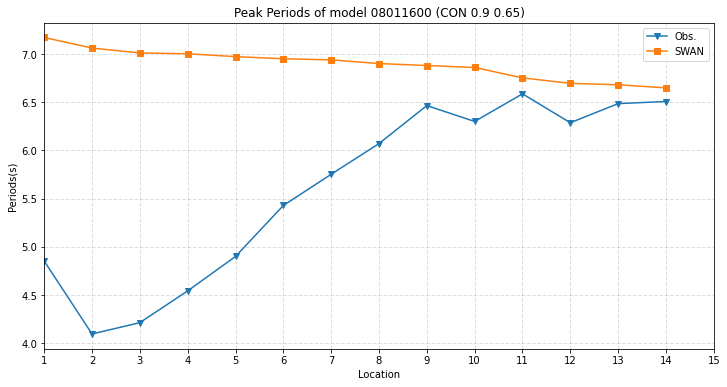

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


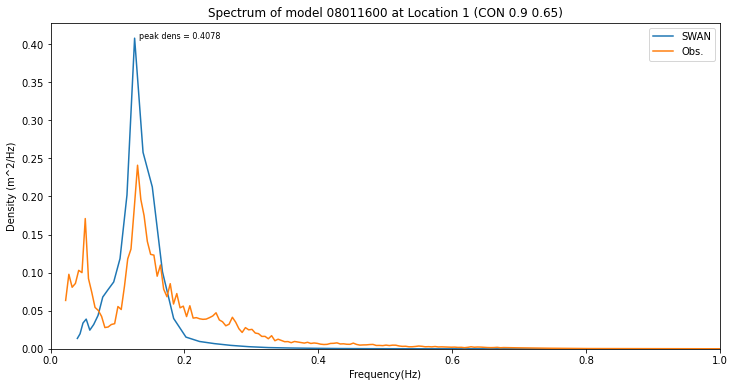

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


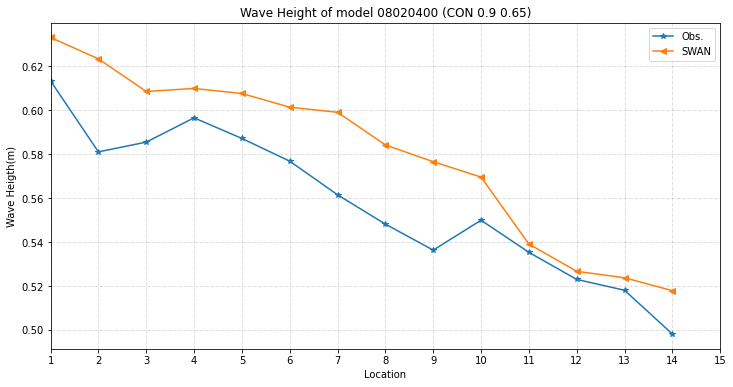

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


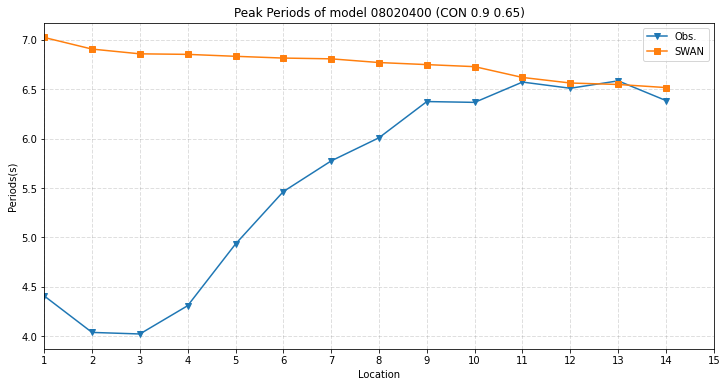

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


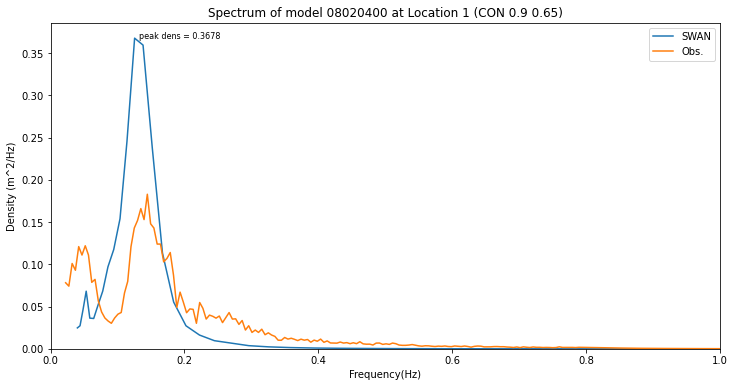

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


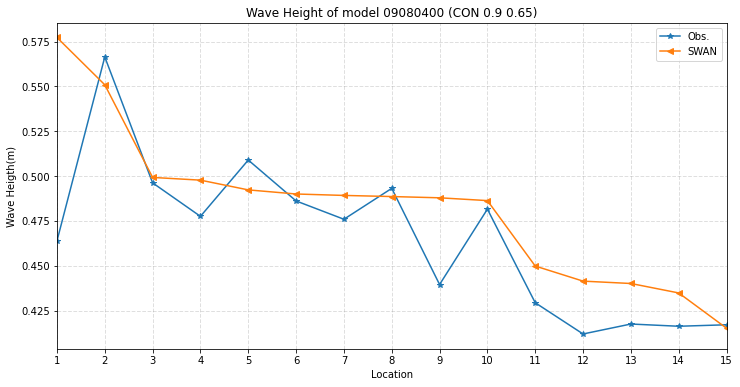

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


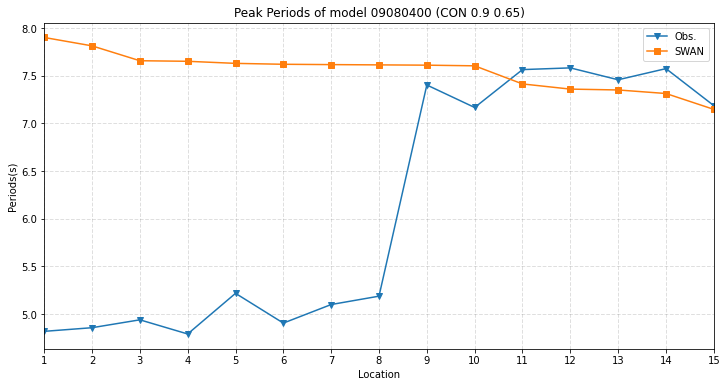

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


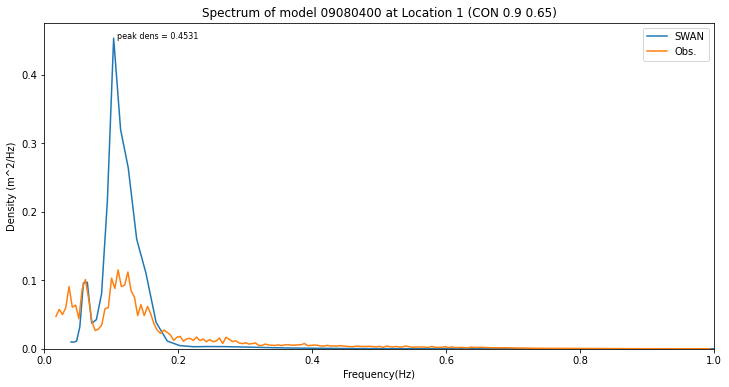

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


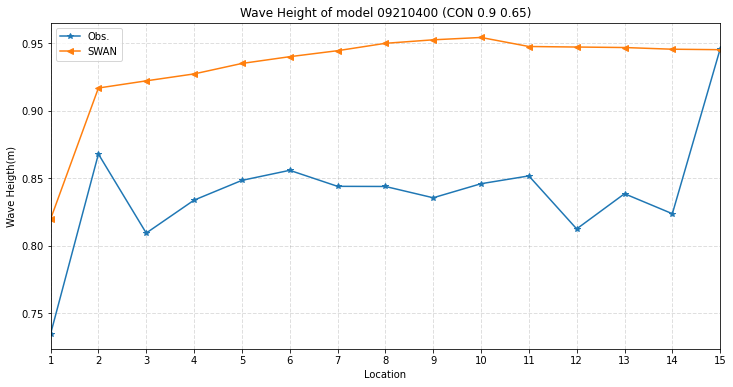

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


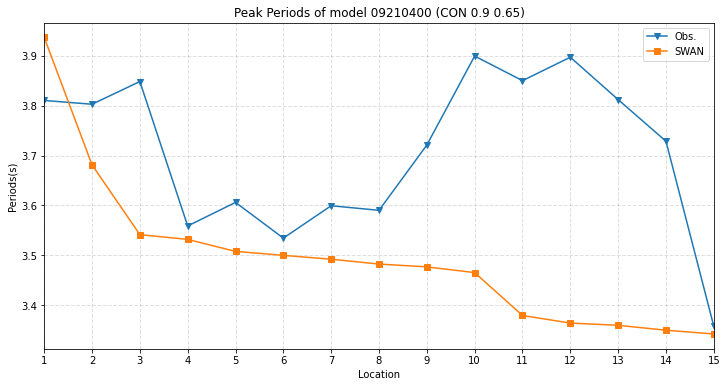

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


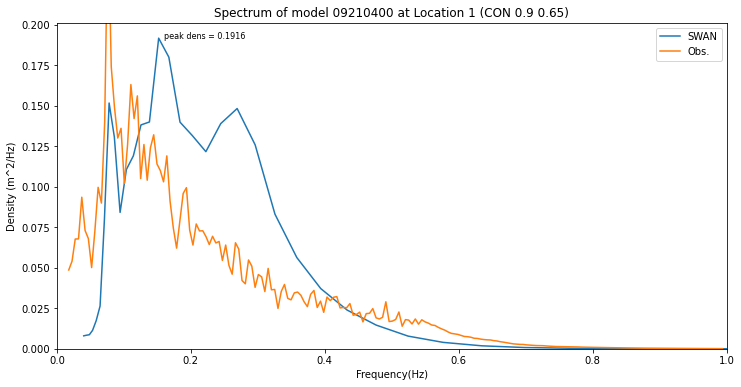

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


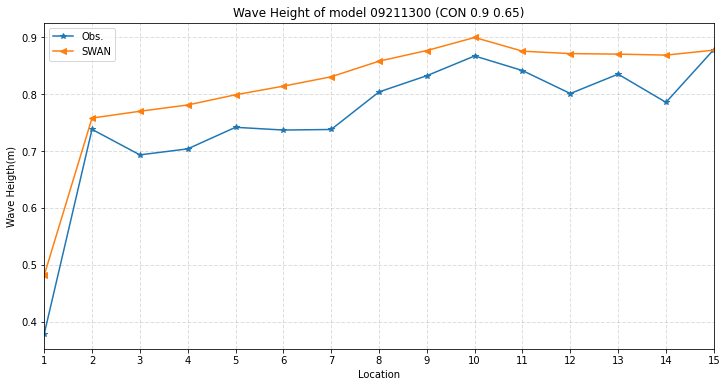

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


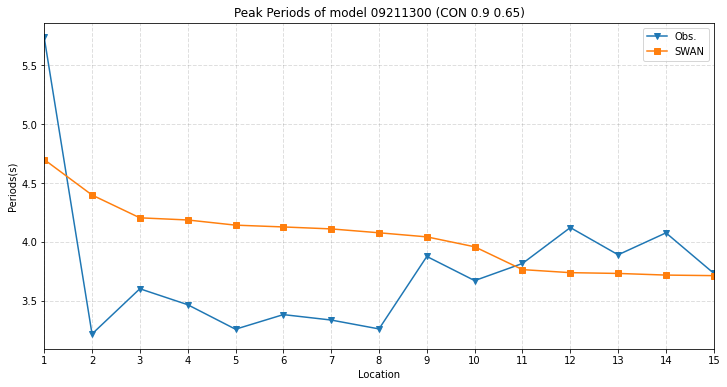

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


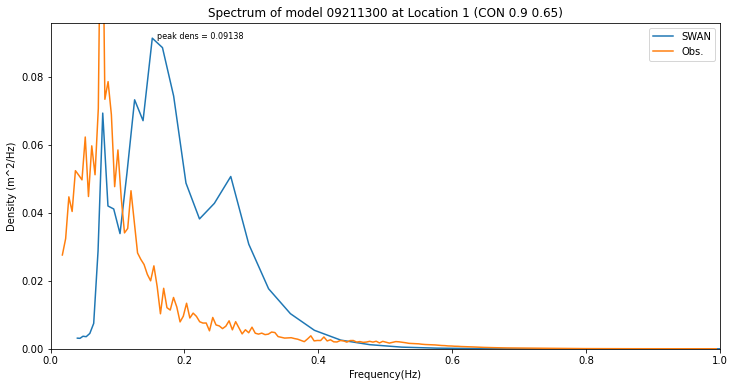

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


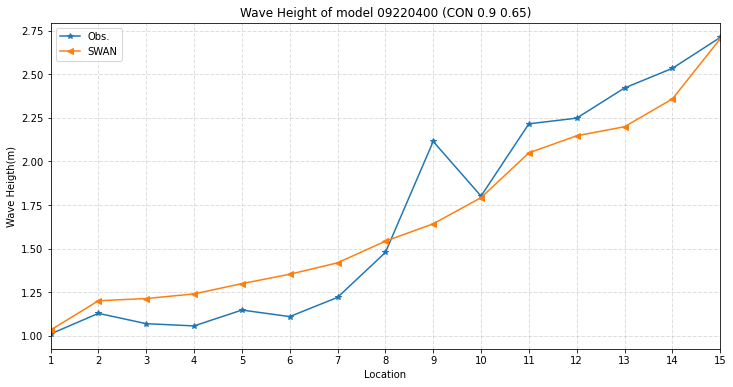

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


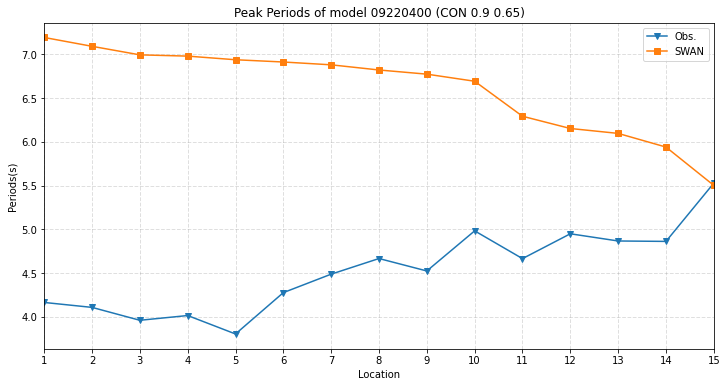

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


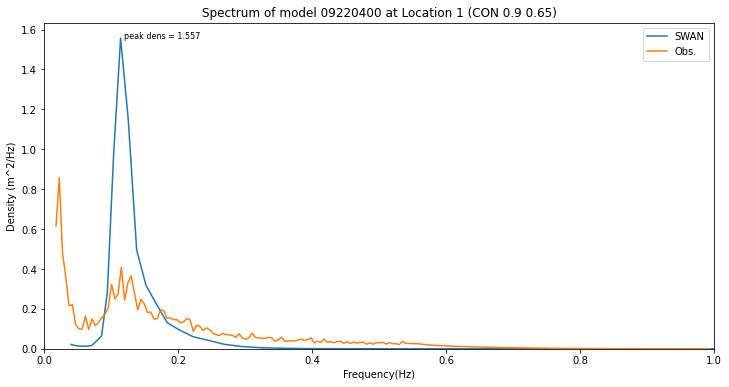

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


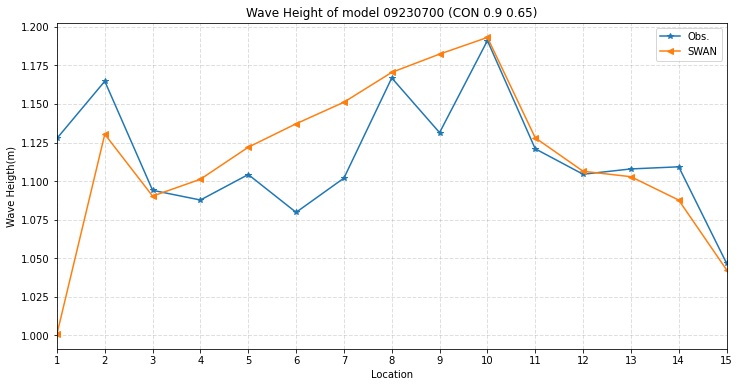

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


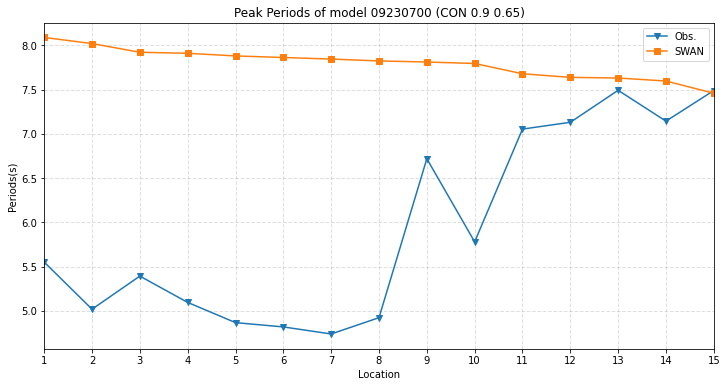

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


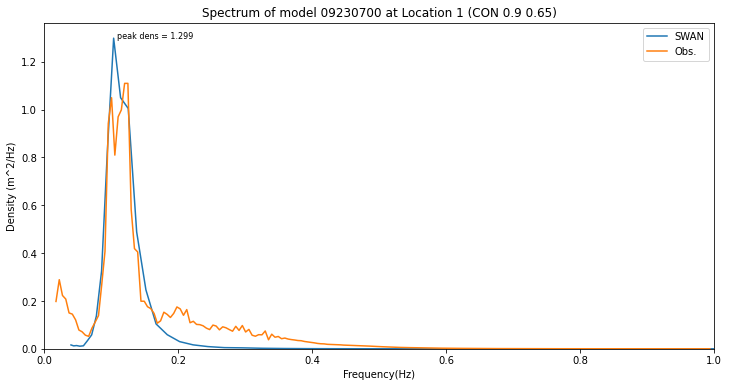

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


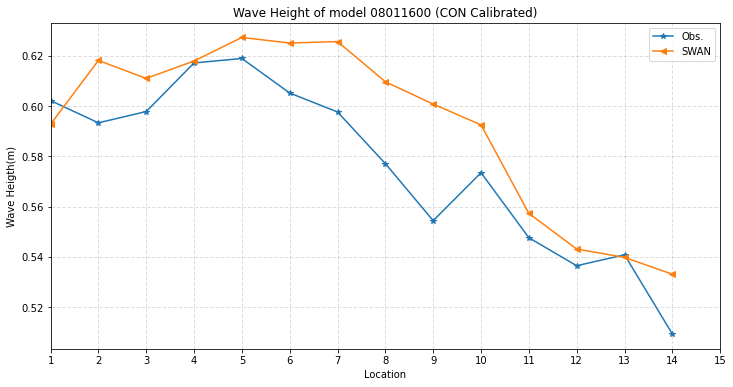

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


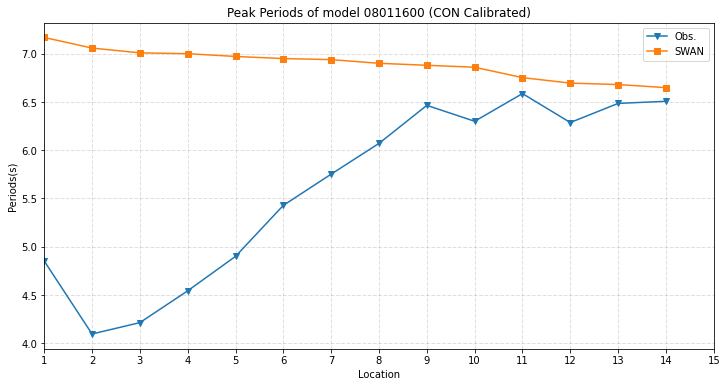

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


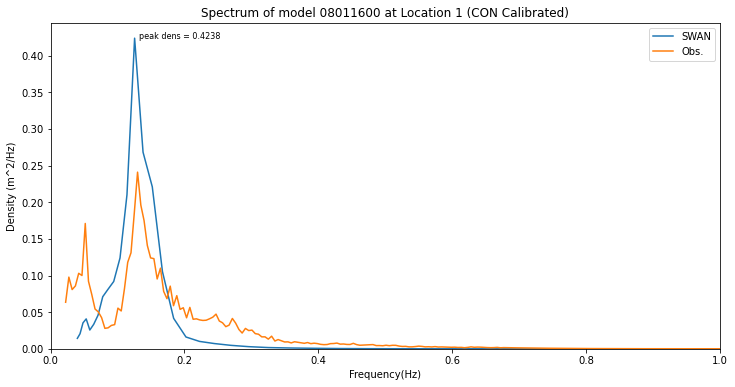

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


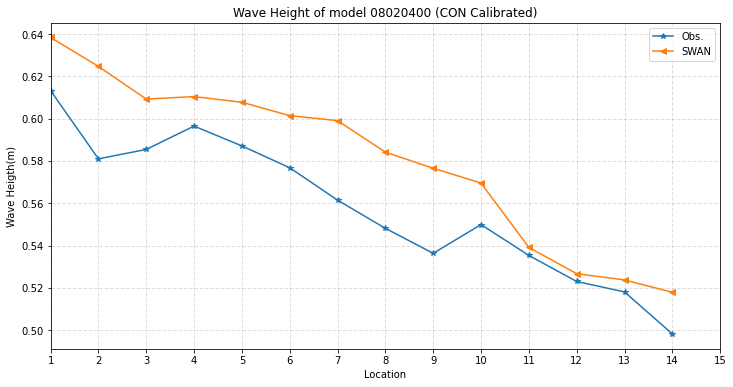

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


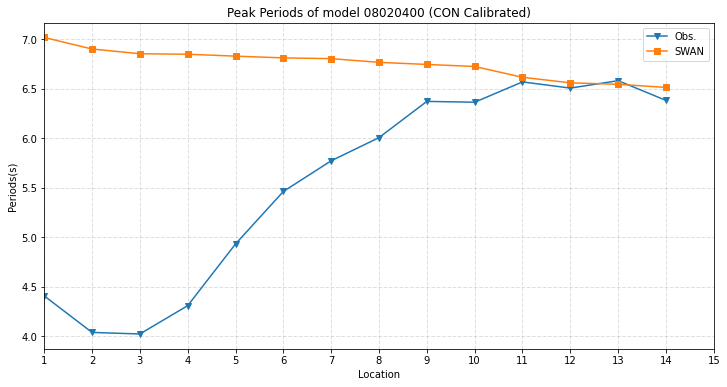

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


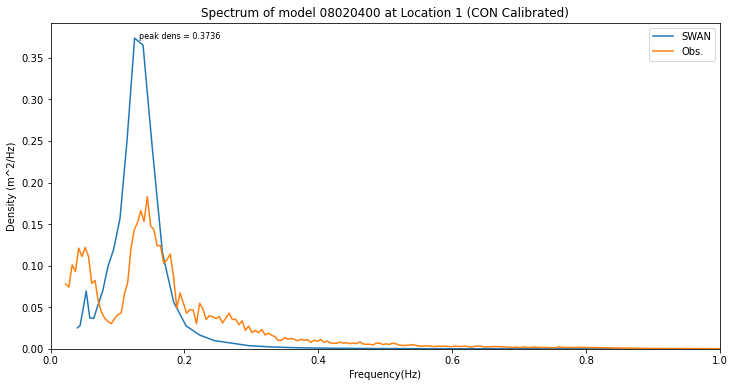

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


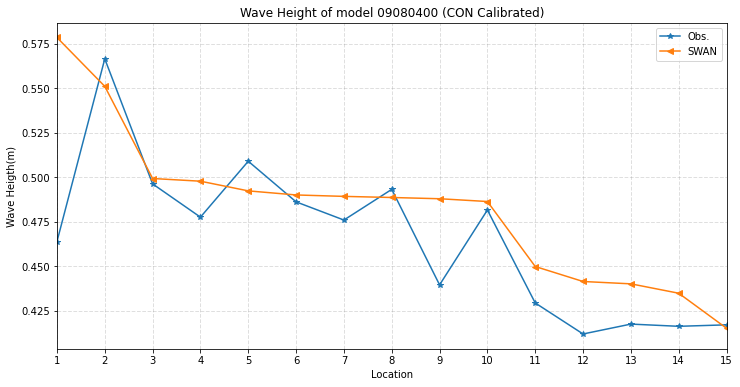

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


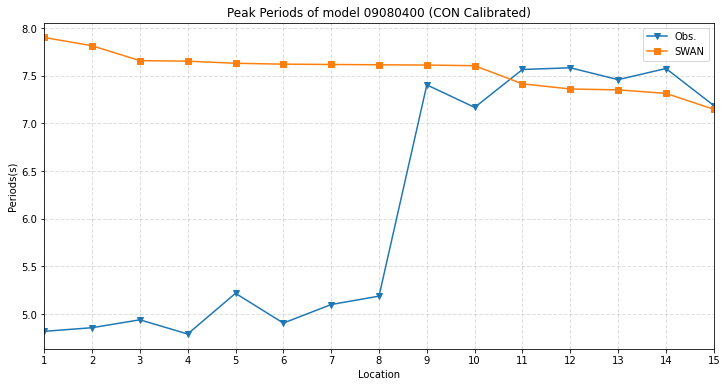

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


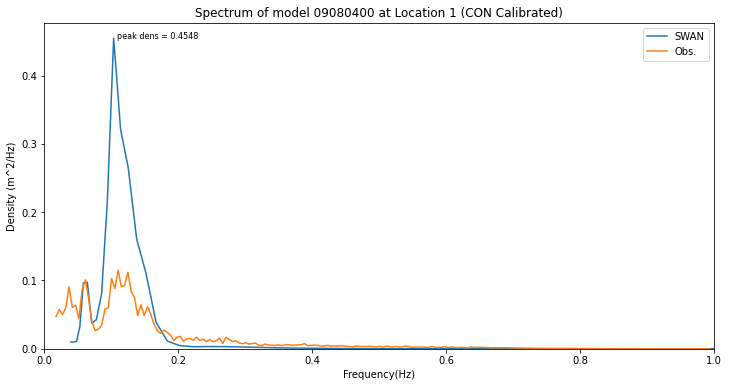

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


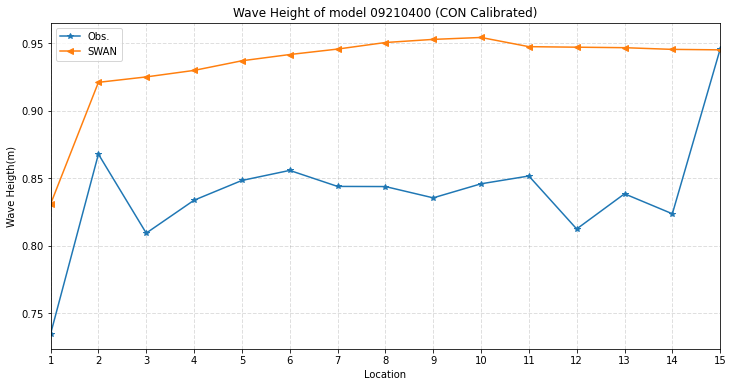

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


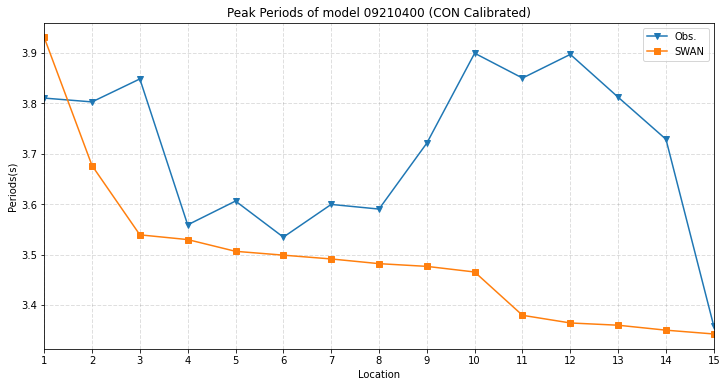

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


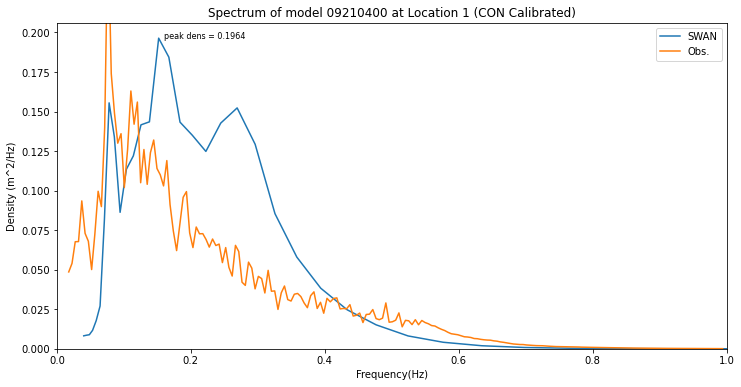

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


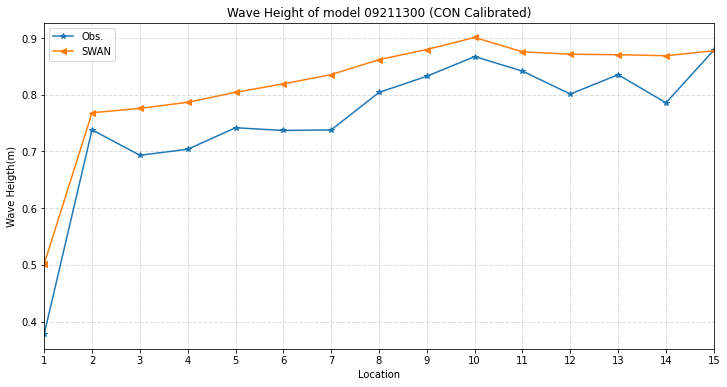

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


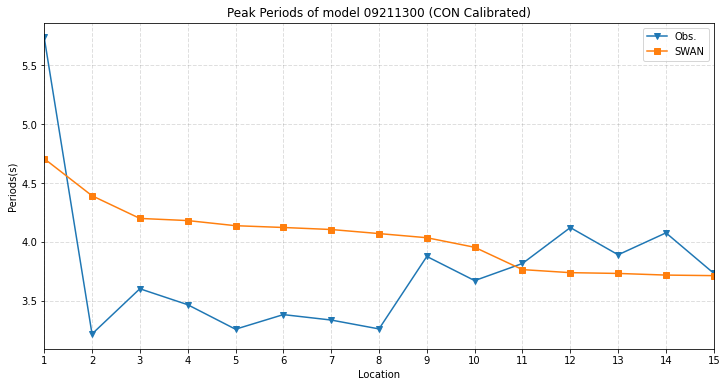

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


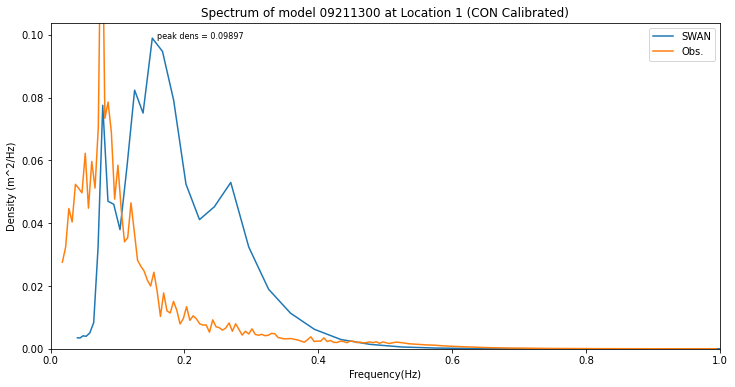

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


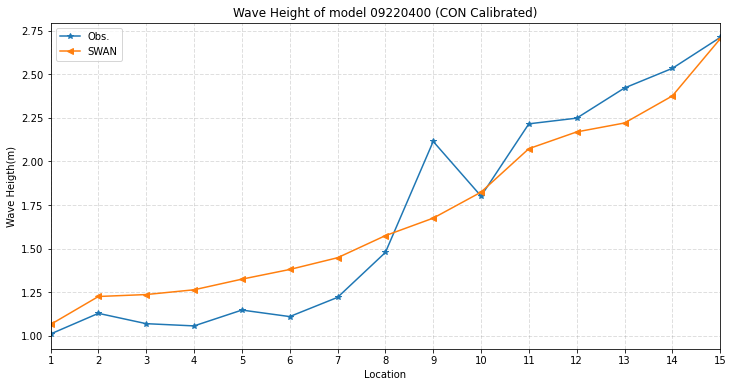

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


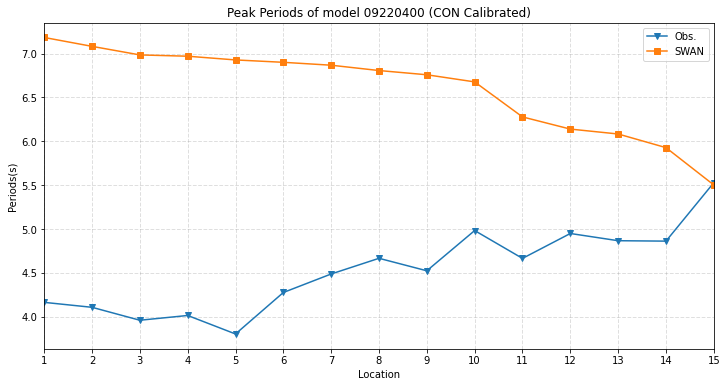

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


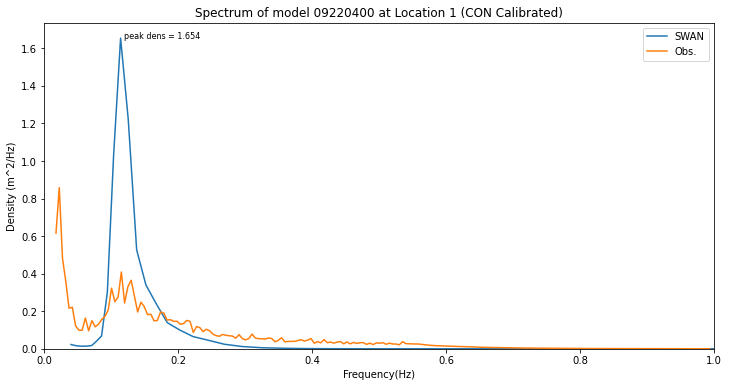

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


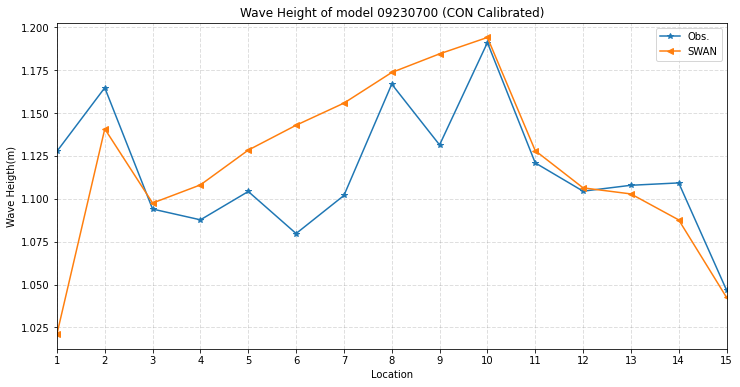

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


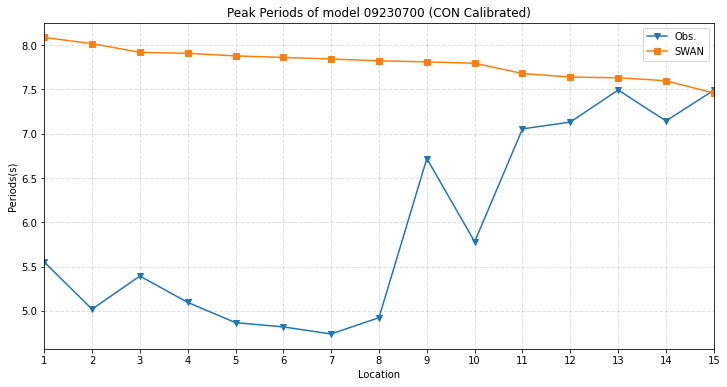

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


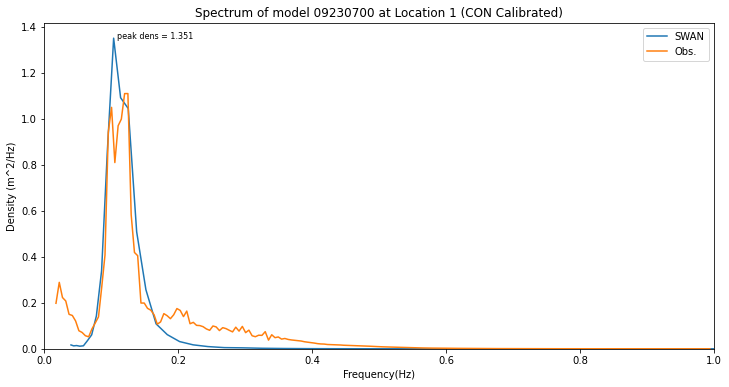

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


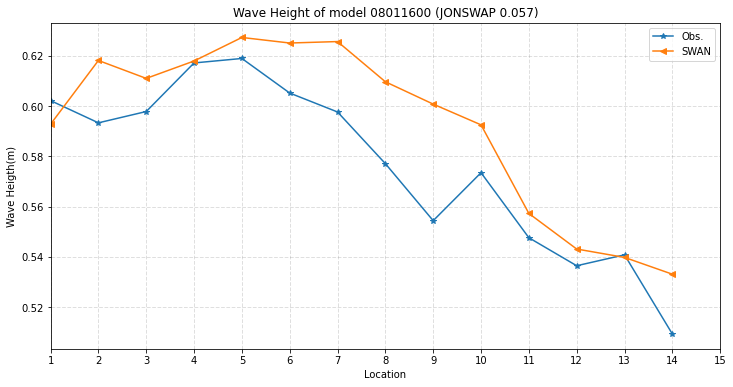

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


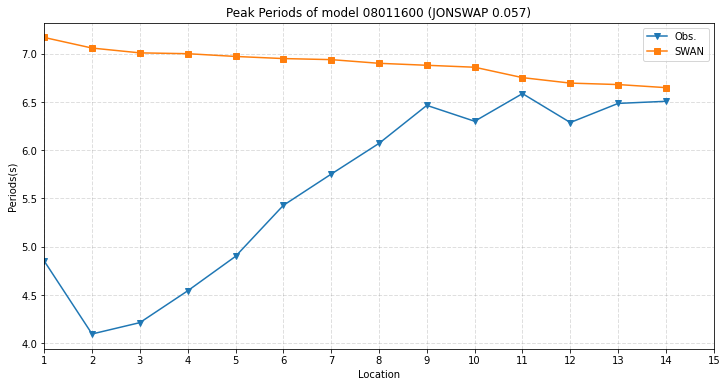

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


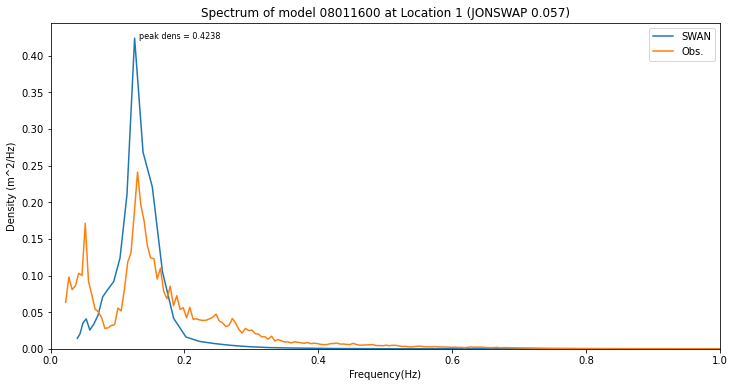

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


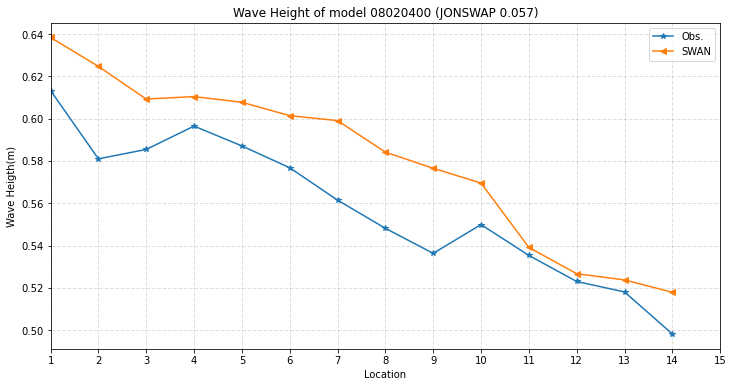

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


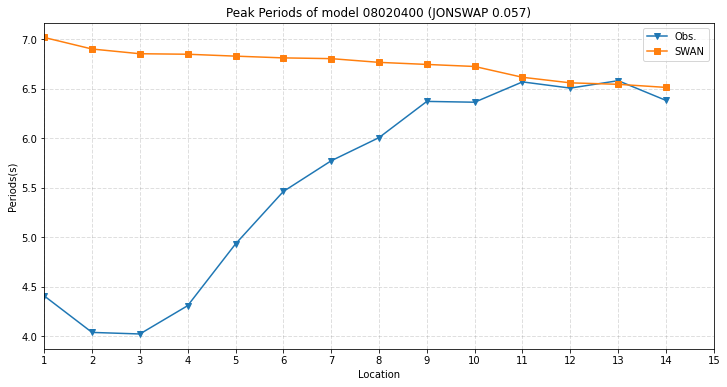

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


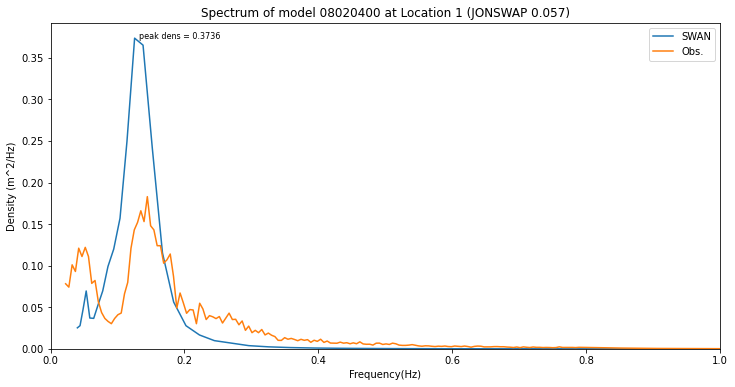

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


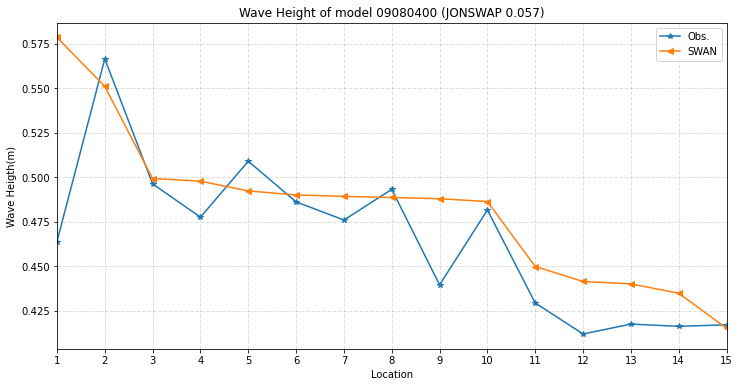

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


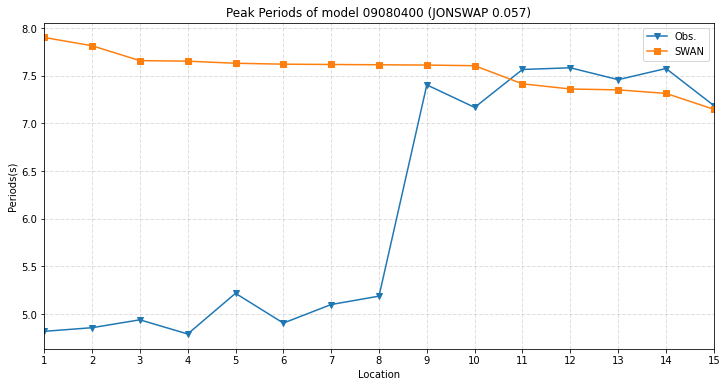

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


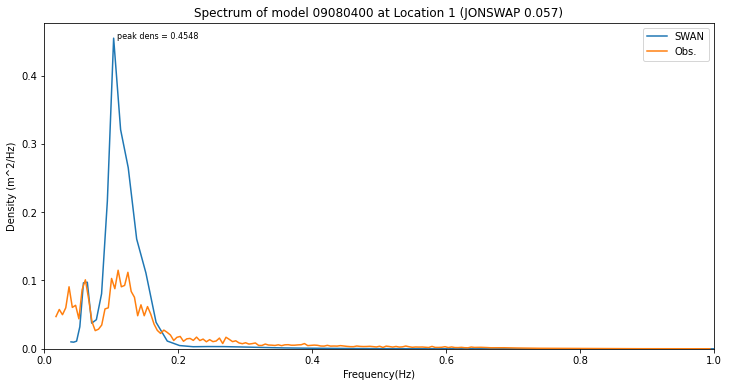

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


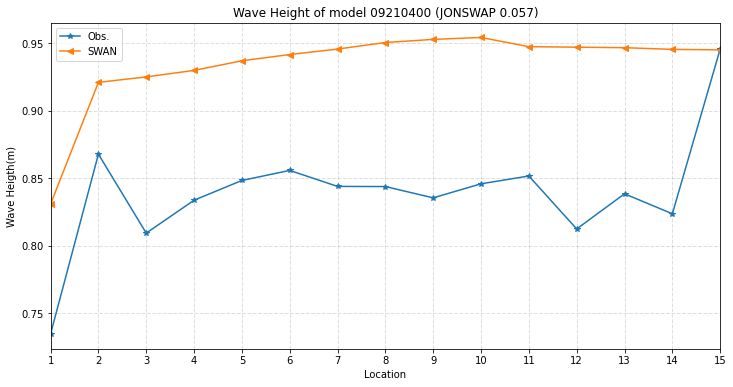

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


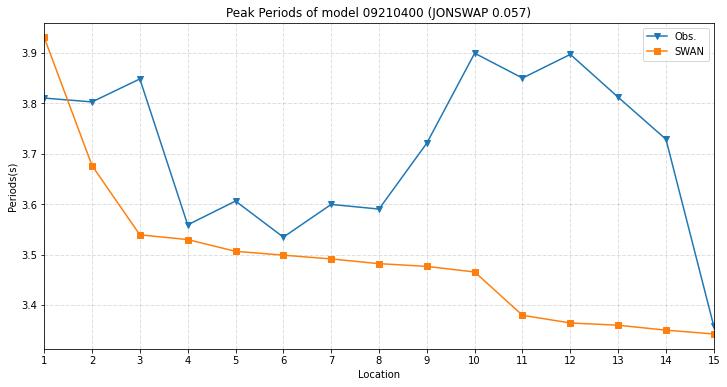

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


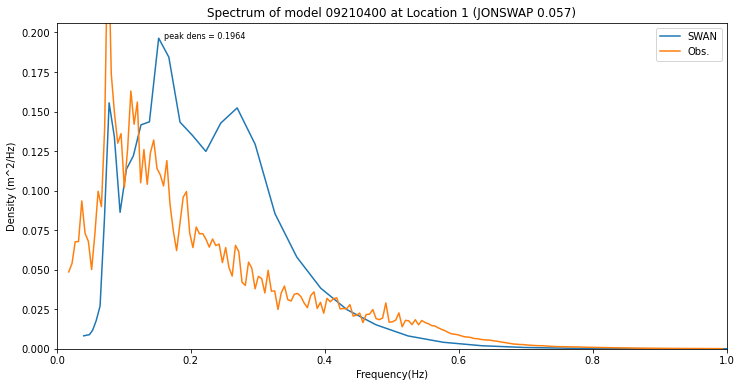

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


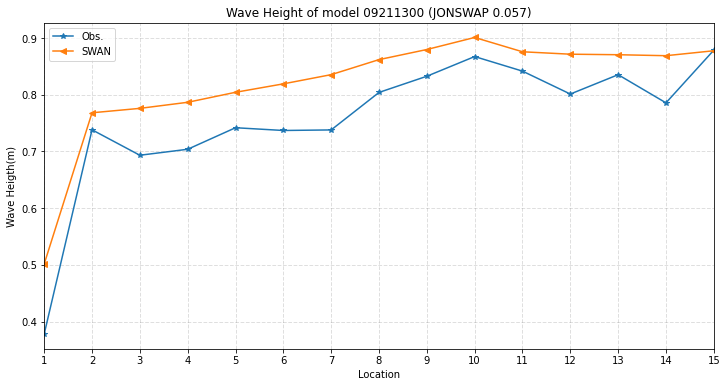

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


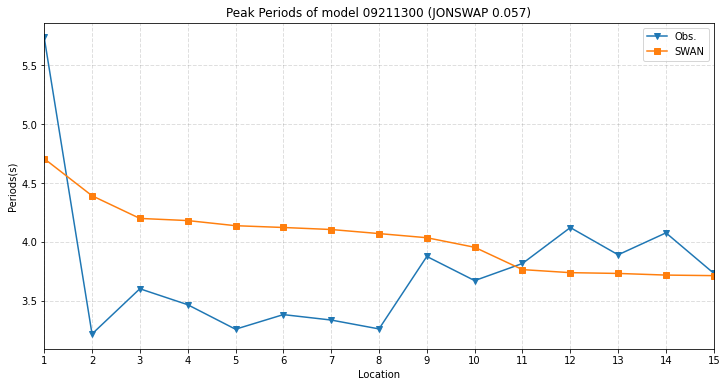

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


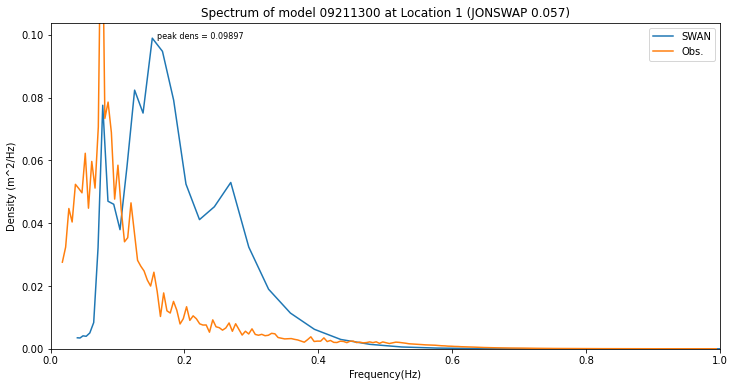

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


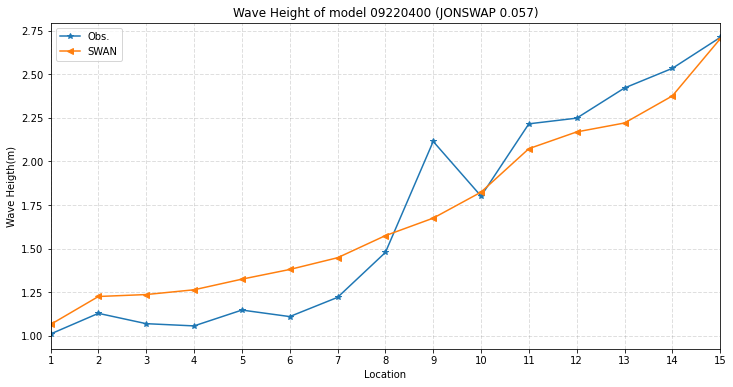

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


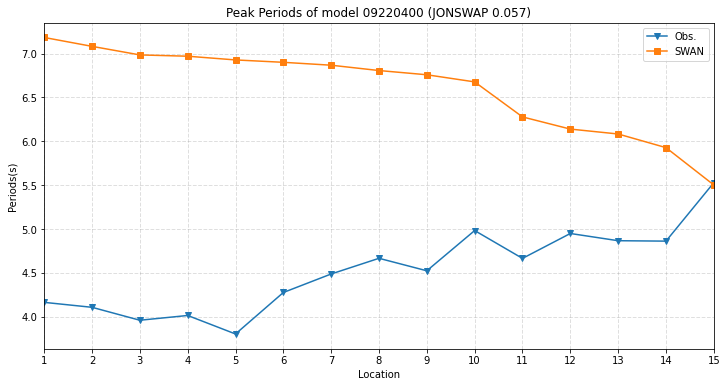

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


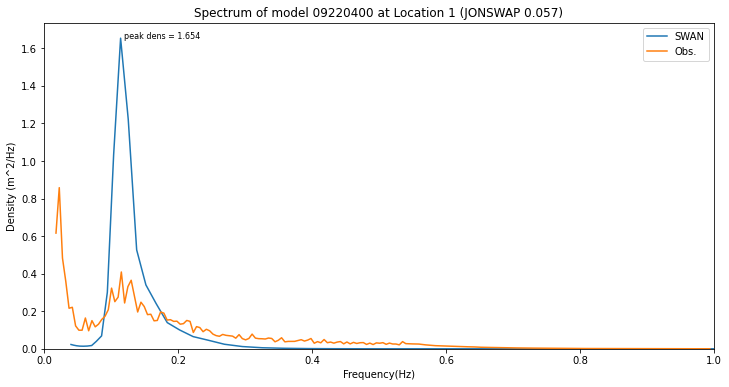

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


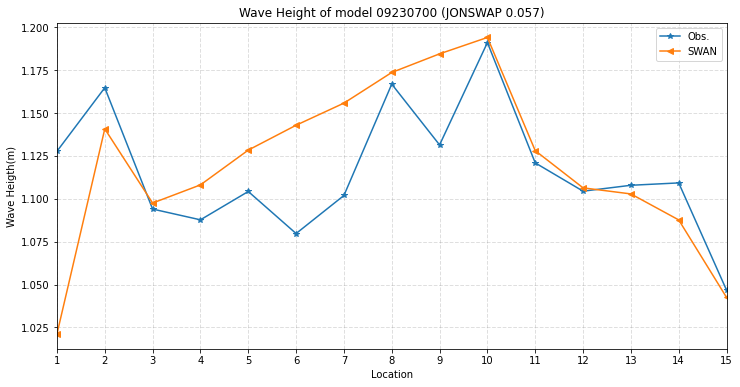

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


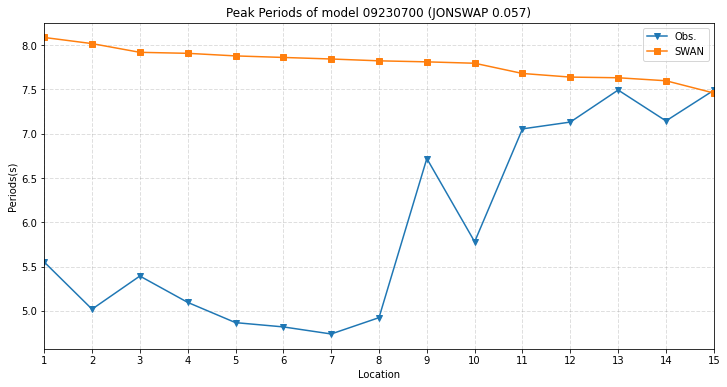

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


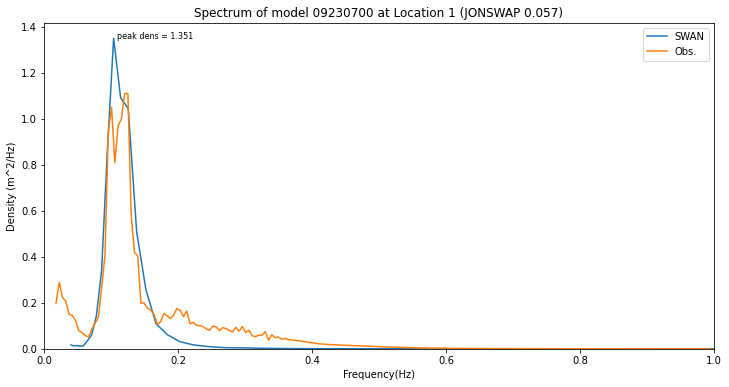

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


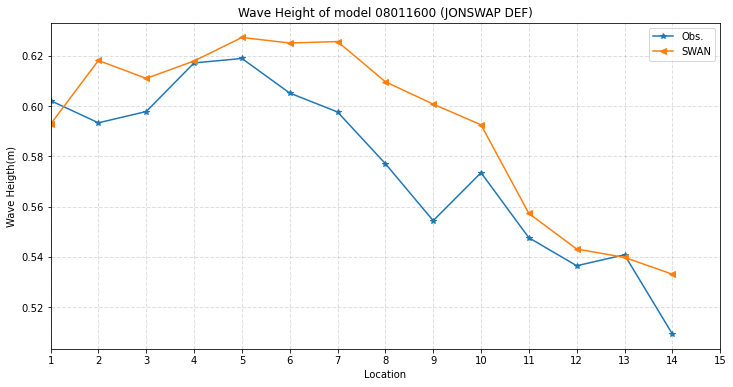

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


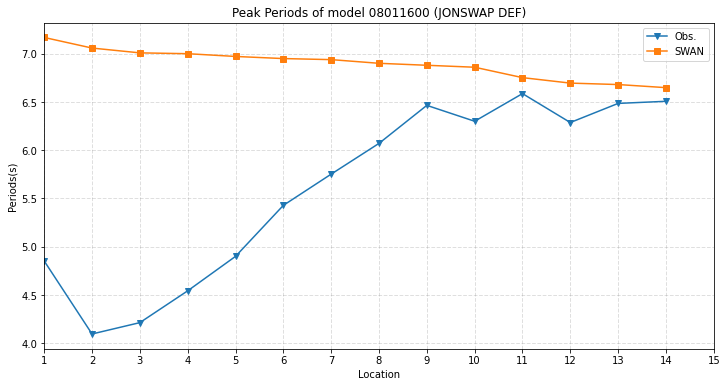

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


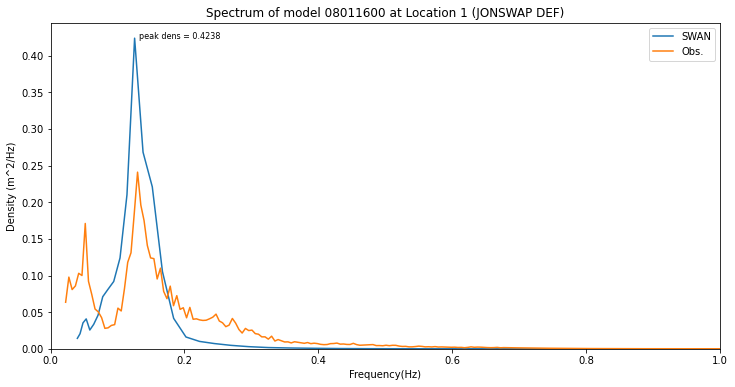

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


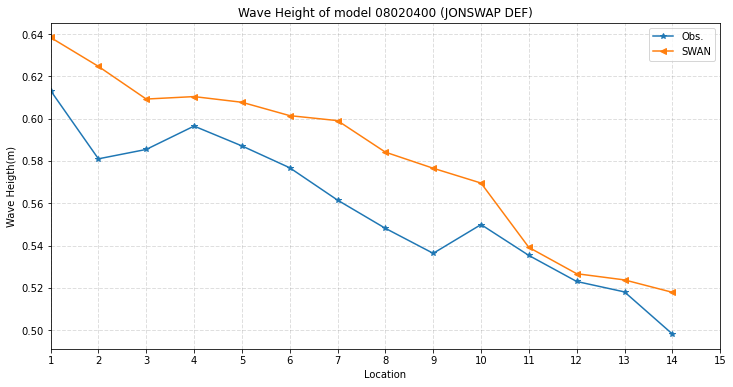

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


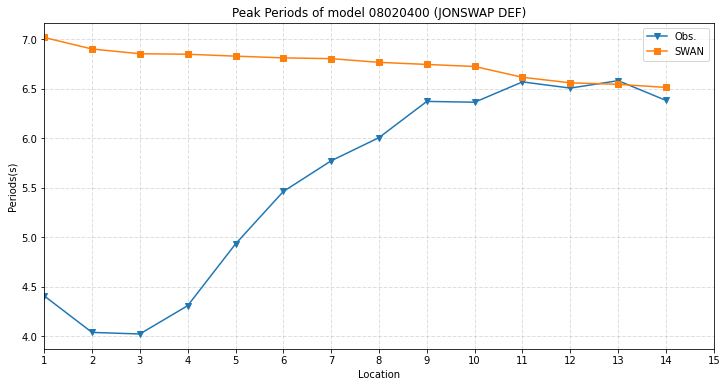

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


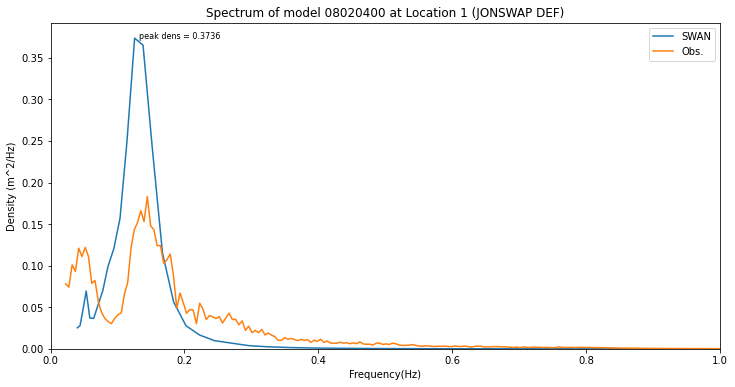

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


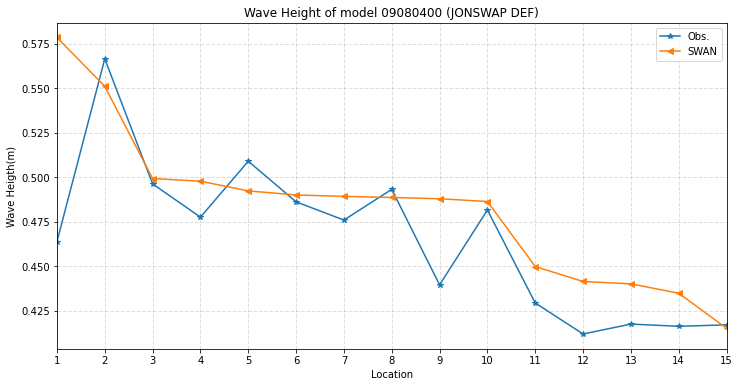

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


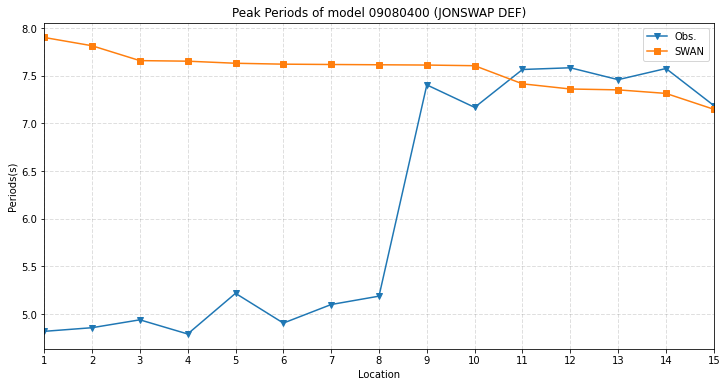

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


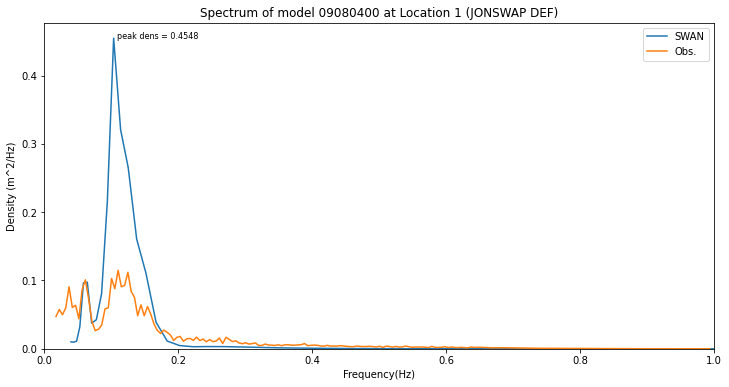

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


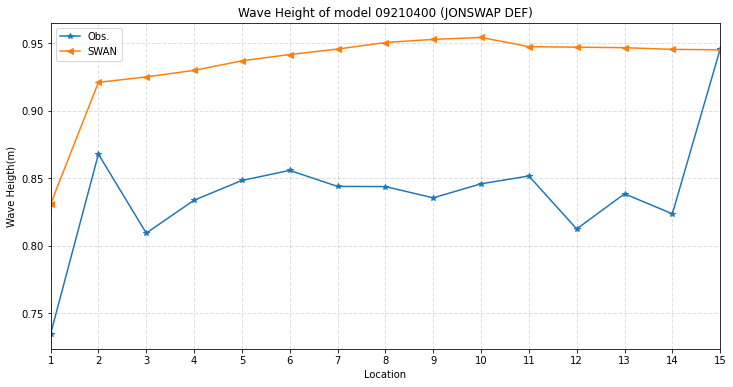

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


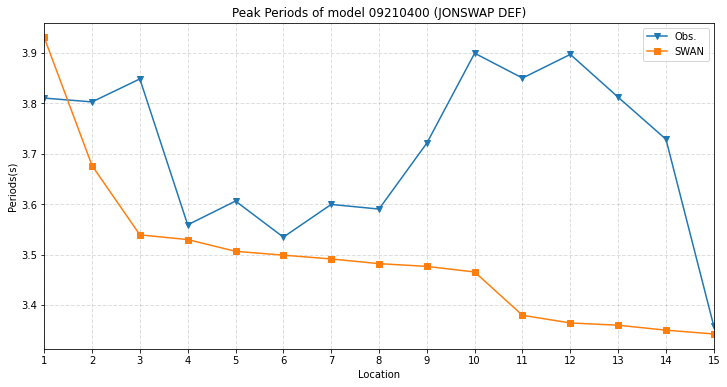

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


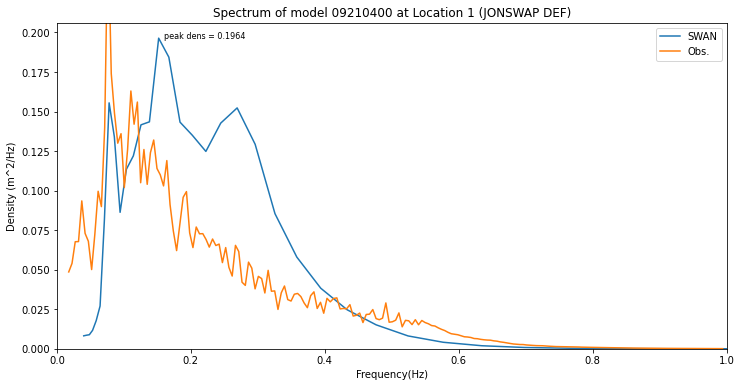

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


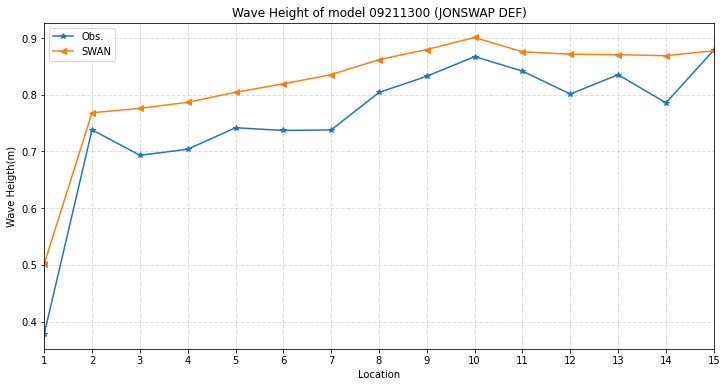

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


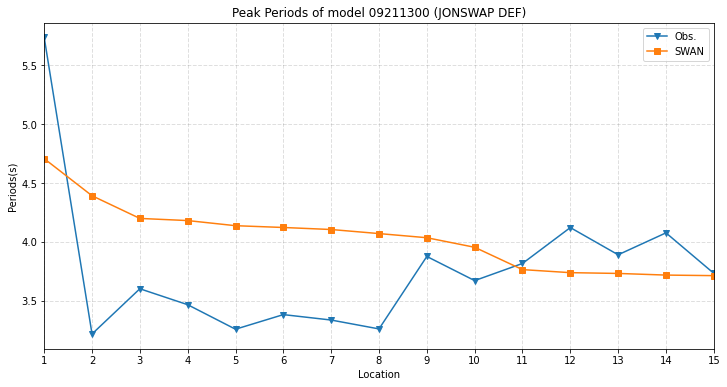

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


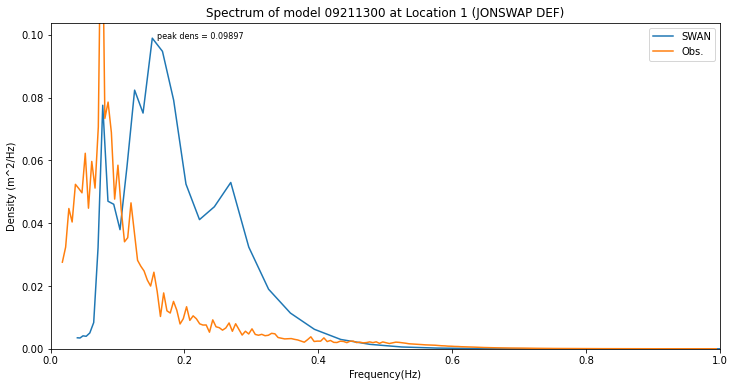

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


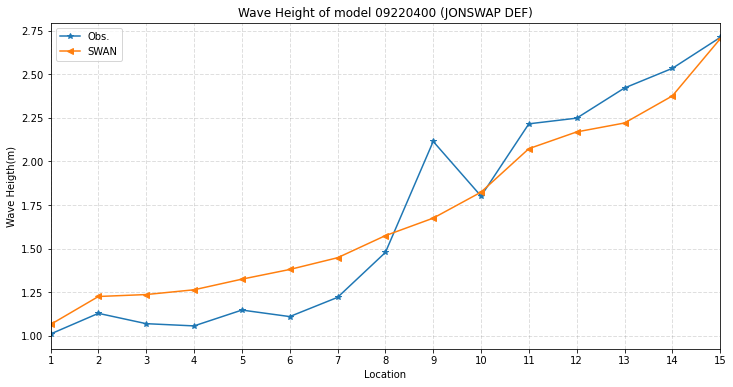

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


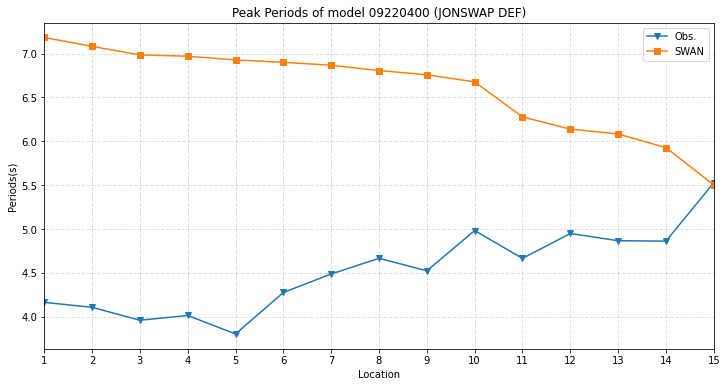

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


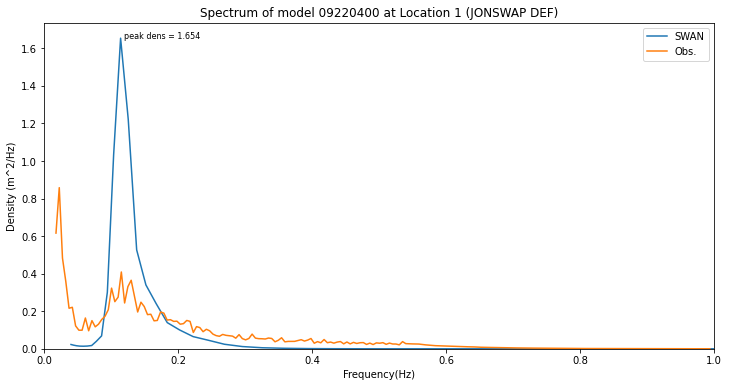

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


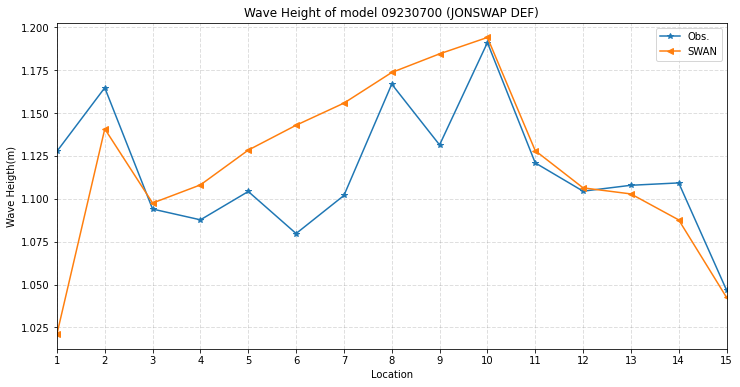

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


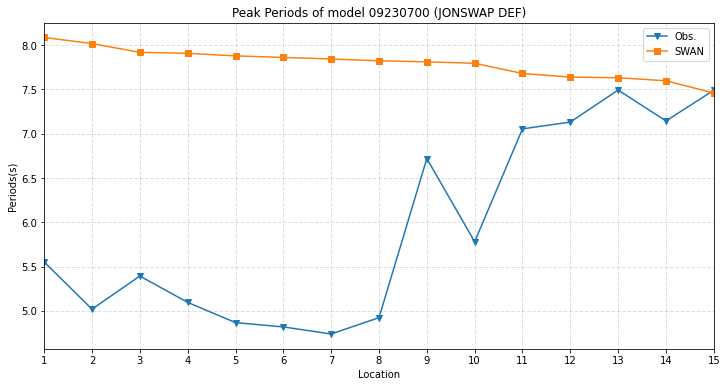

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


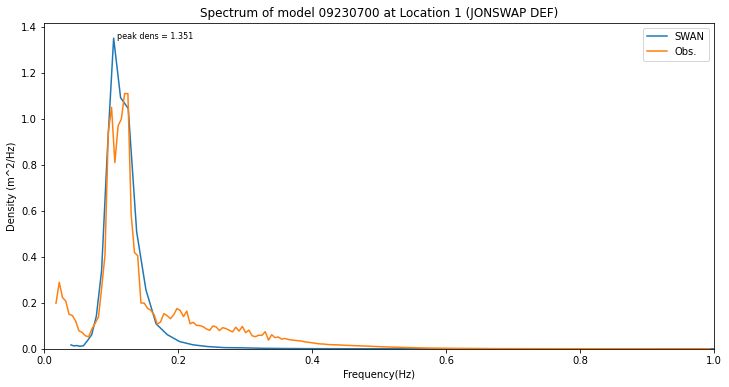

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


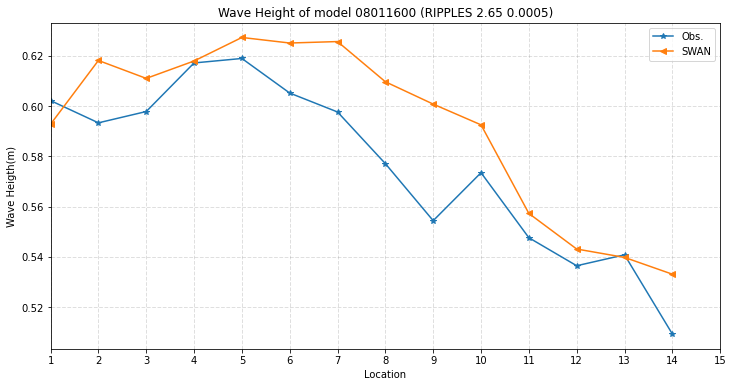

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


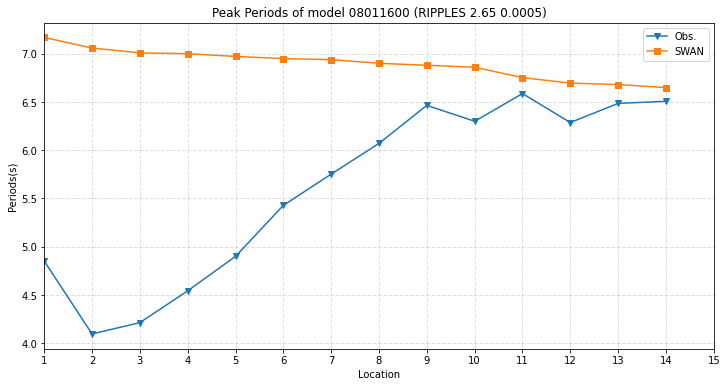

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


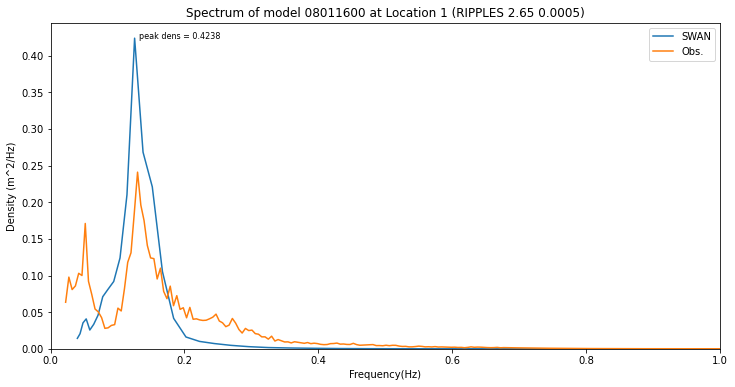

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


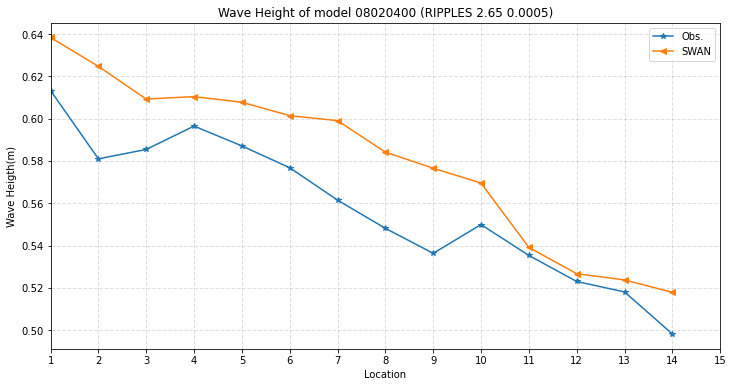

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


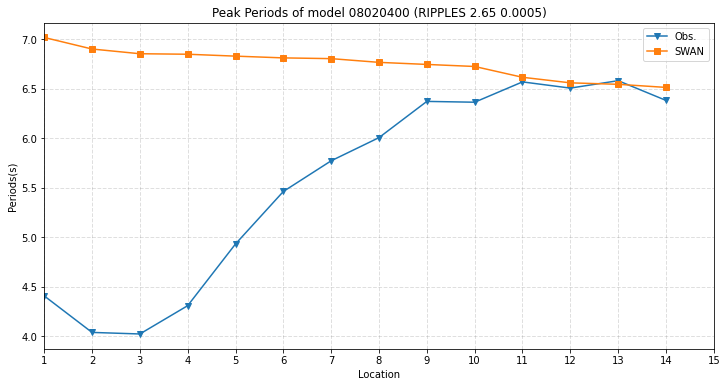

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


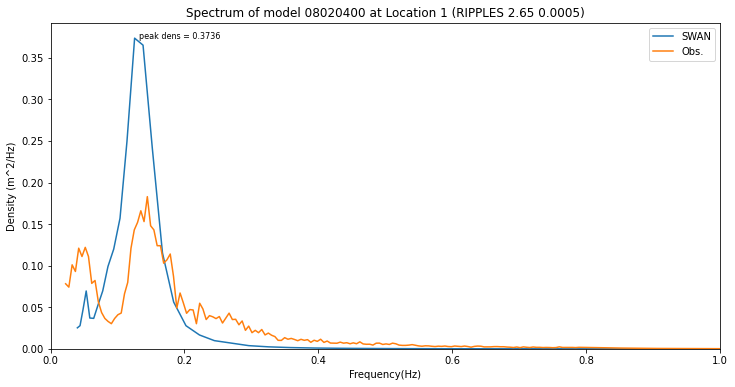

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


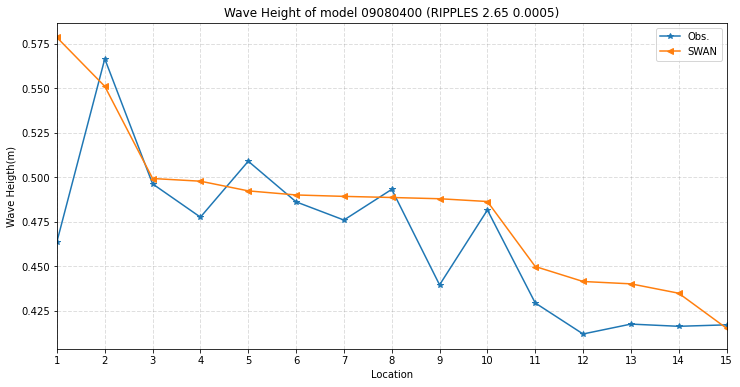

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


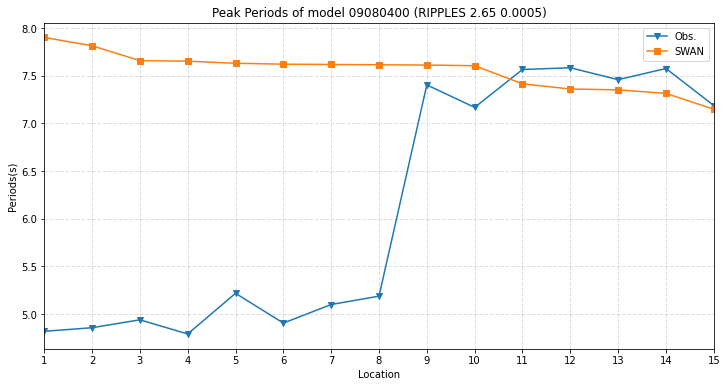

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


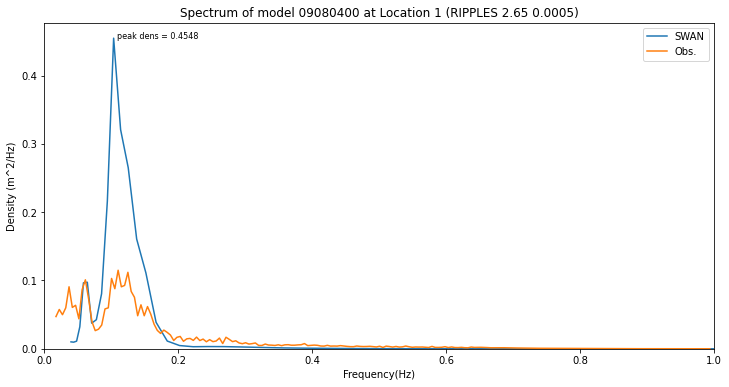

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


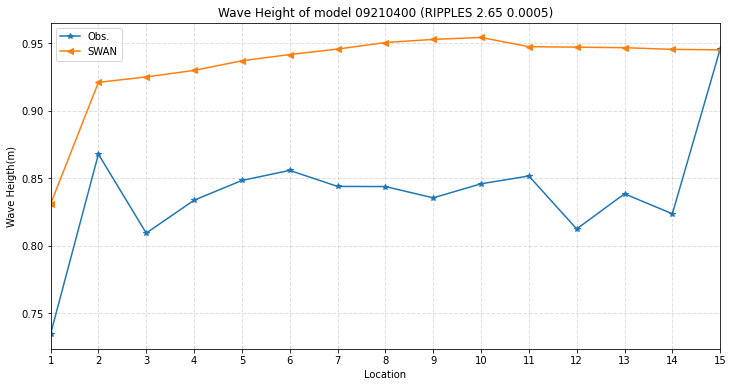

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


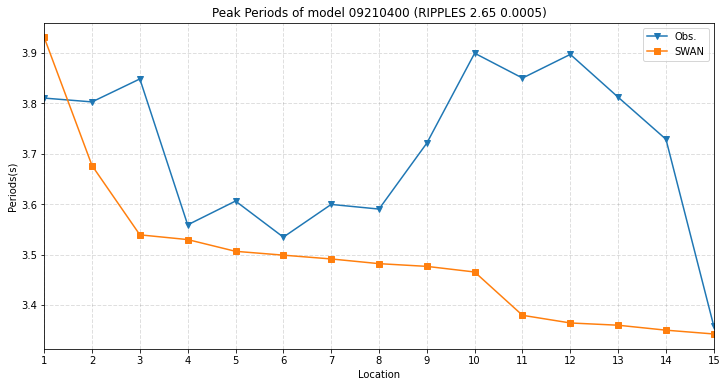

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


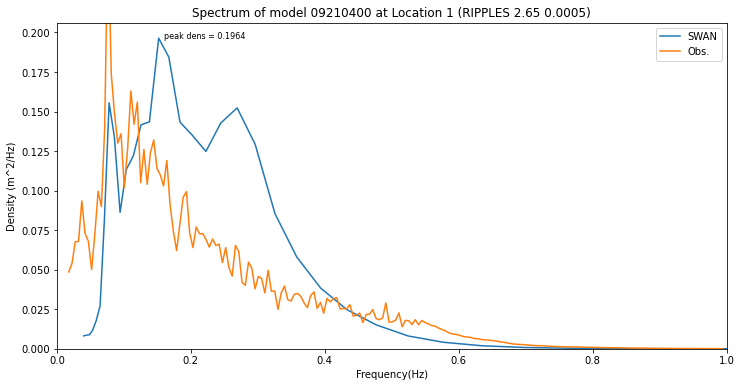

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


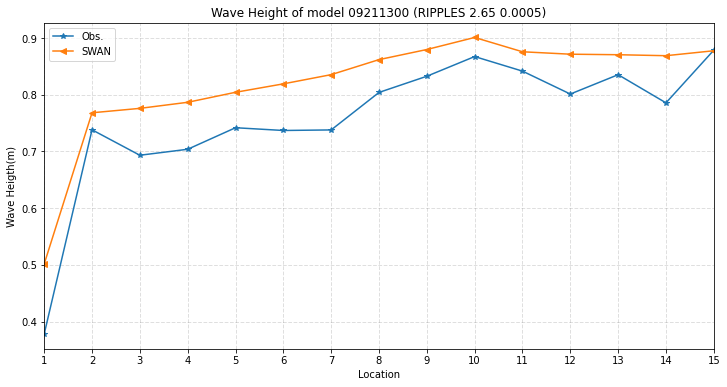

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


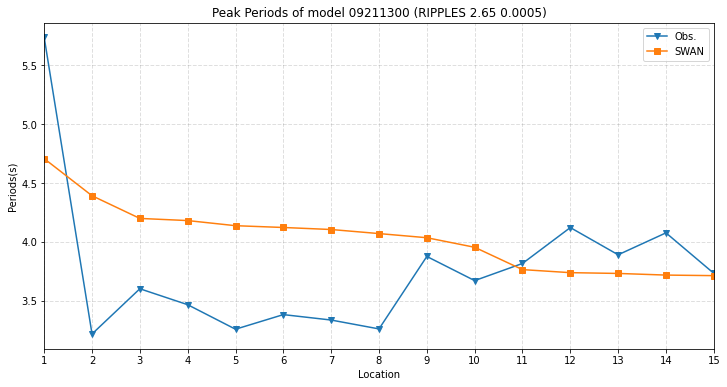

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


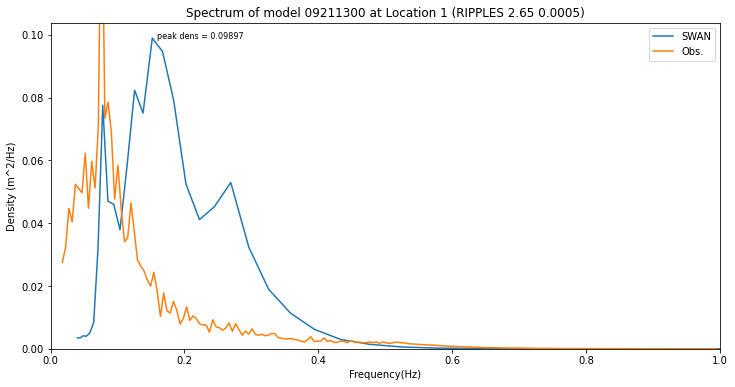

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


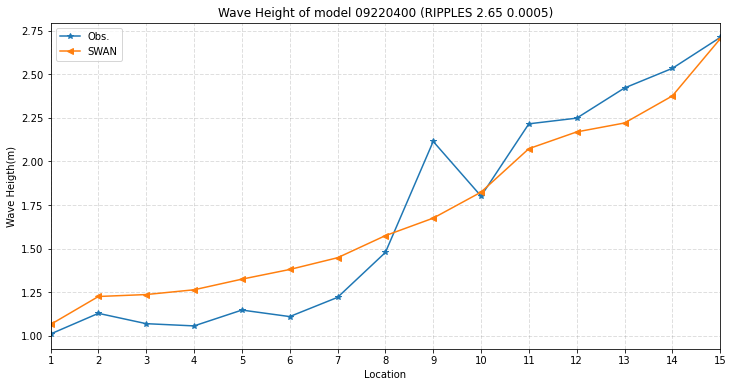

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


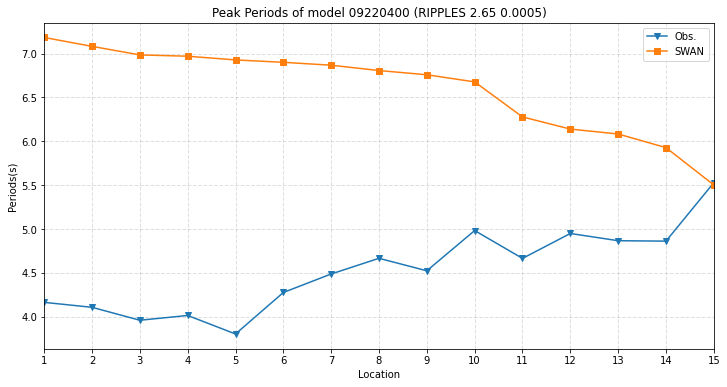

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


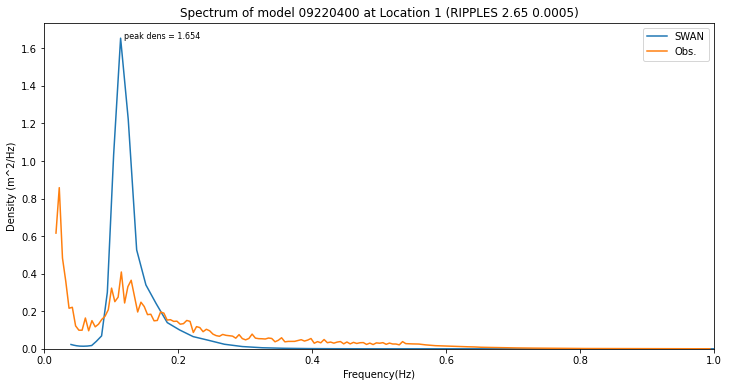

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


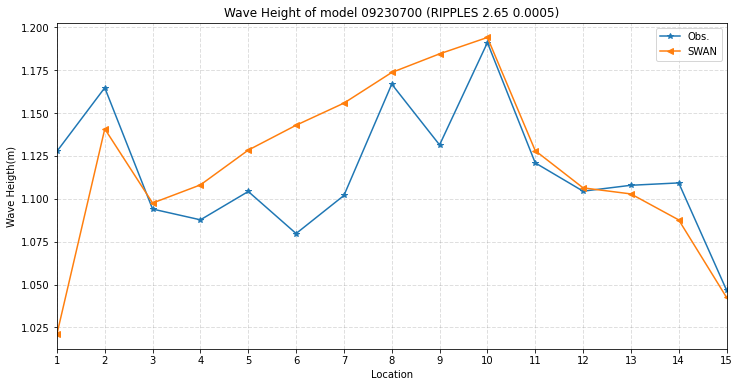

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


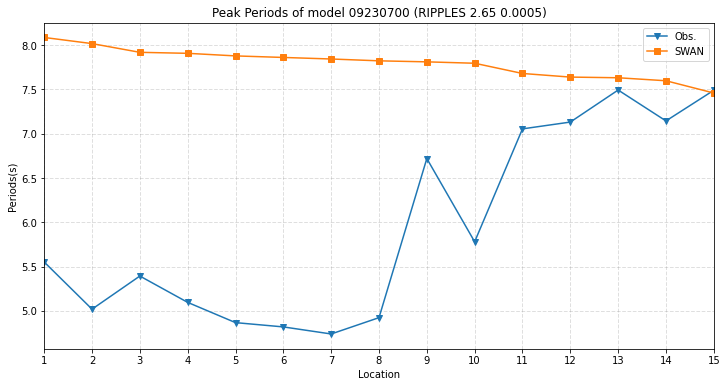

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


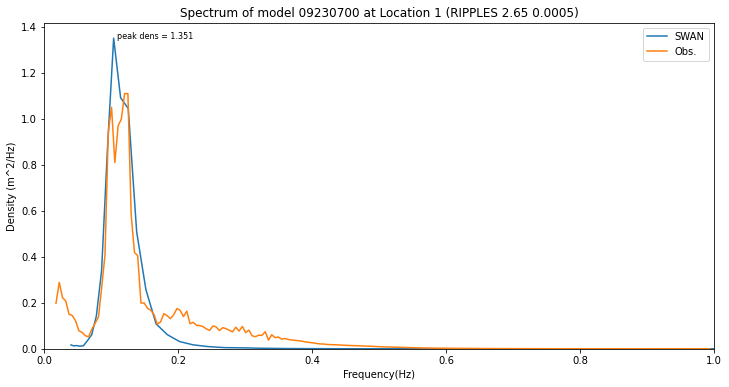

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


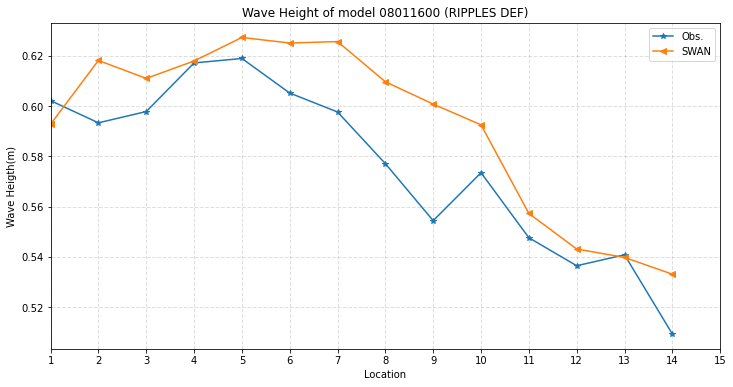

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


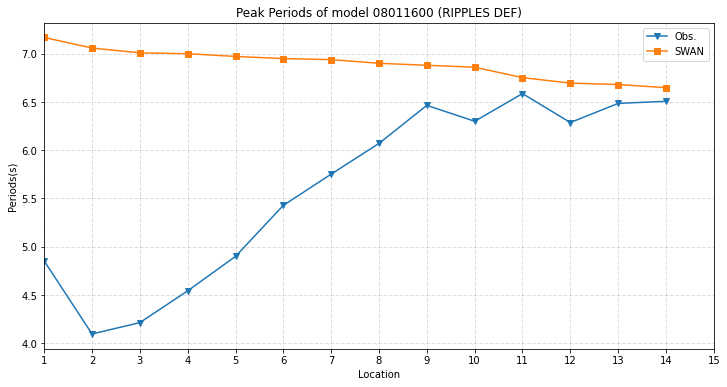

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


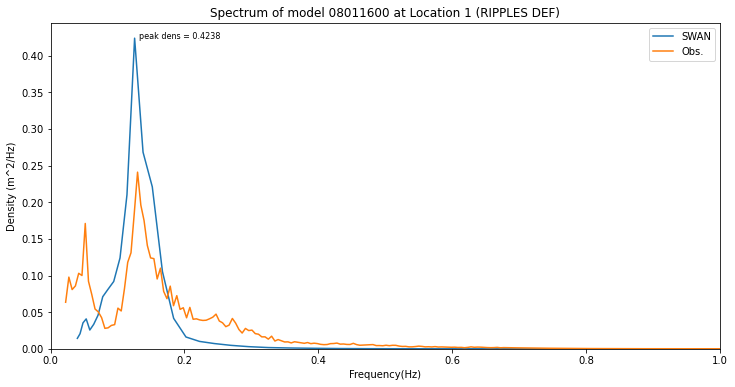

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


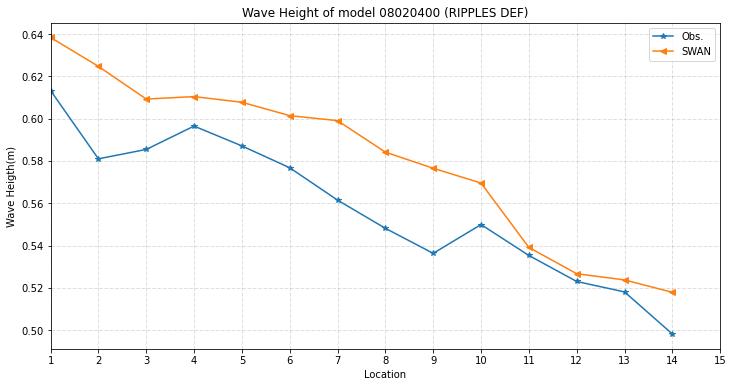

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


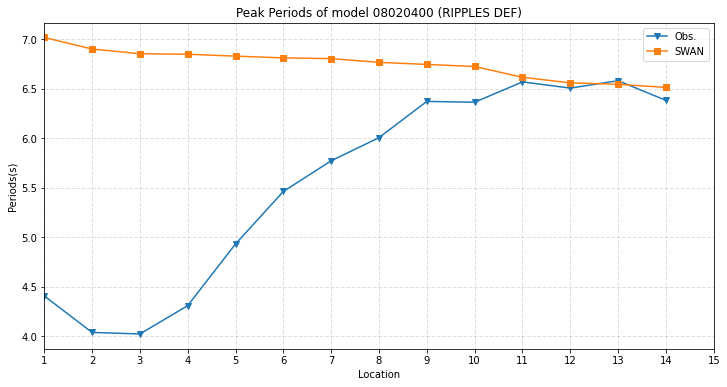

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


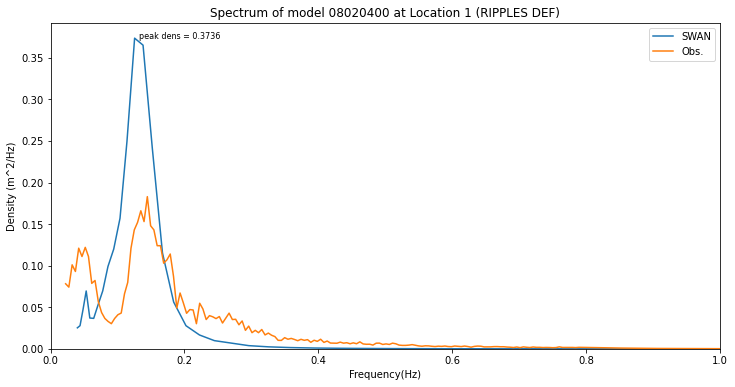

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


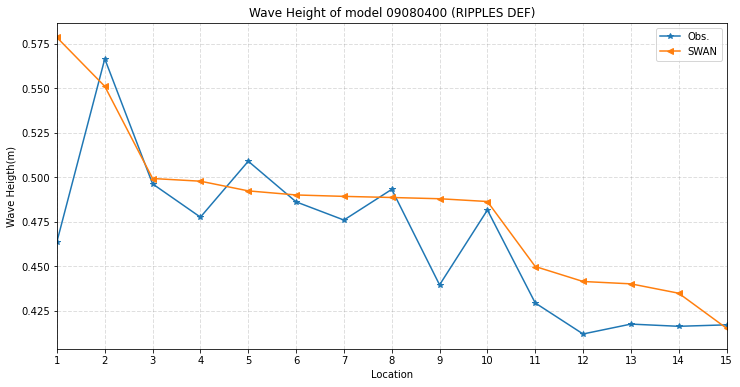

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


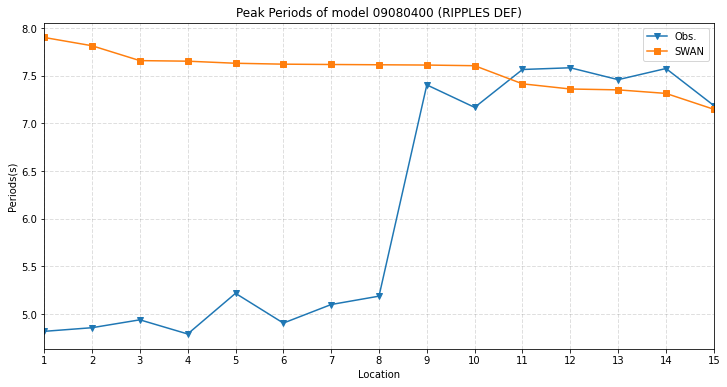

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


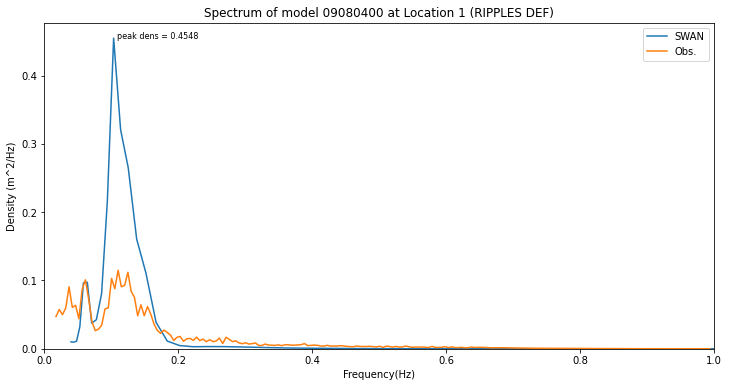

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


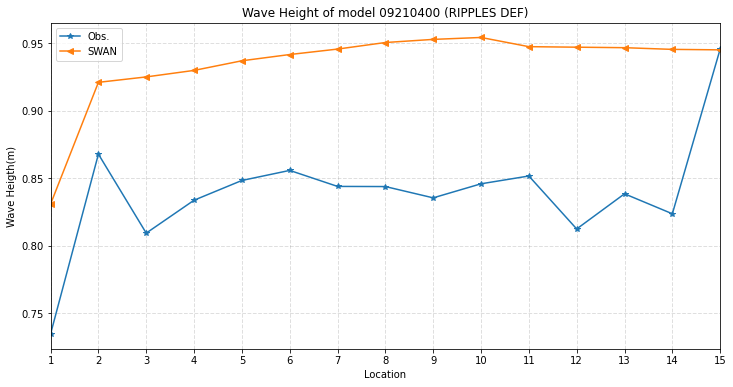

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


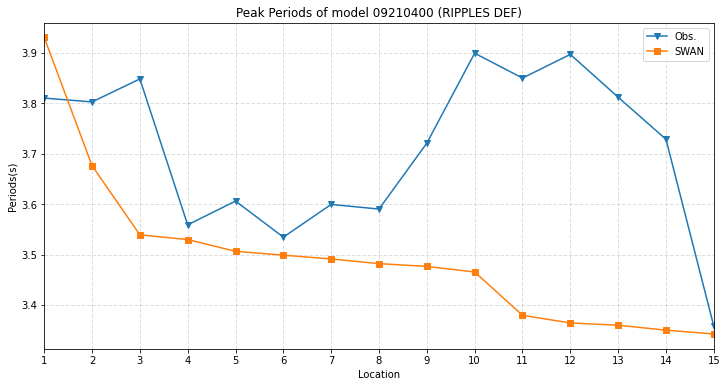

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


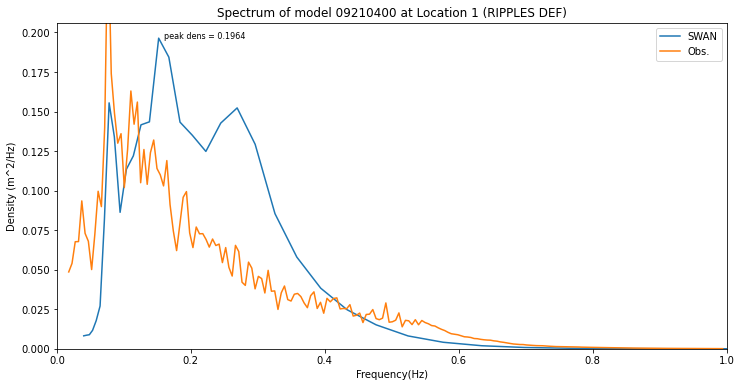

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


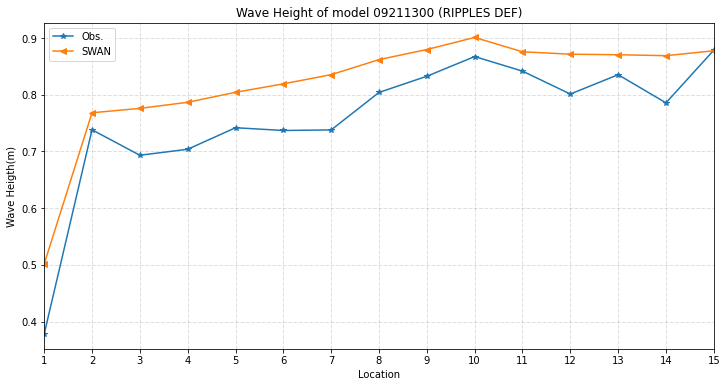

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


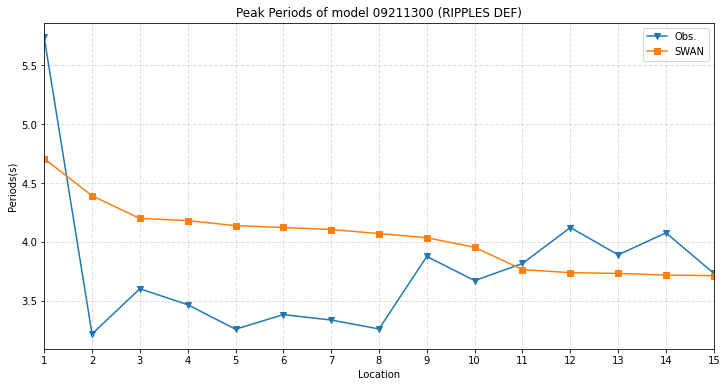

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


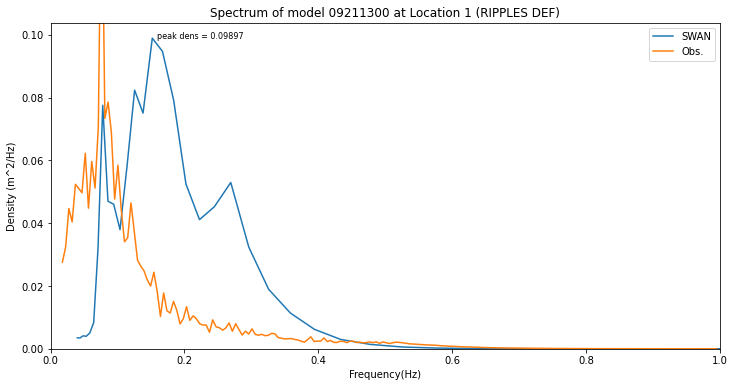

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


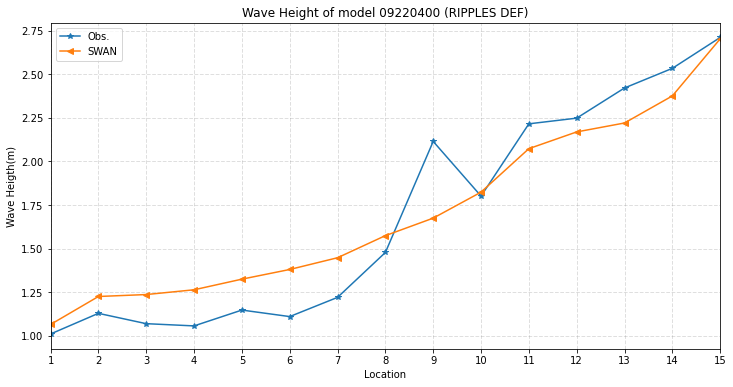

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


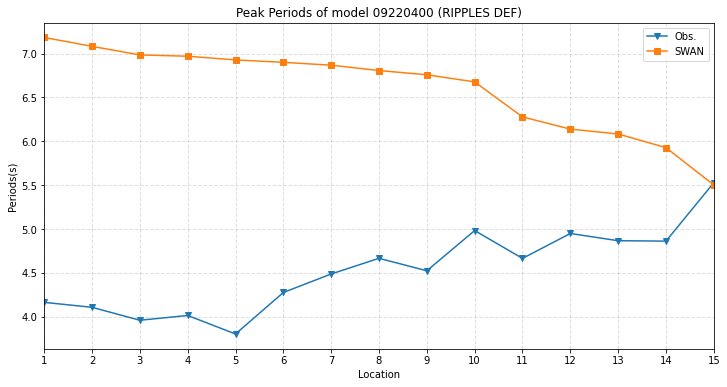

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


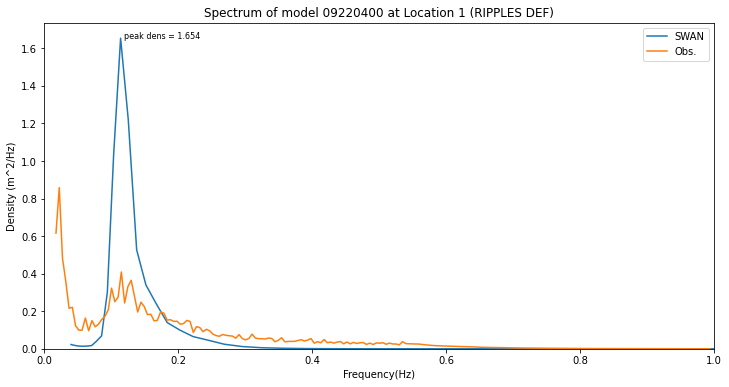

######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######


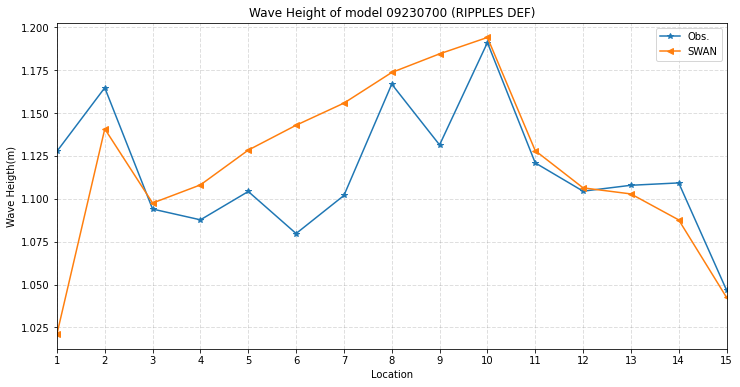

######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######


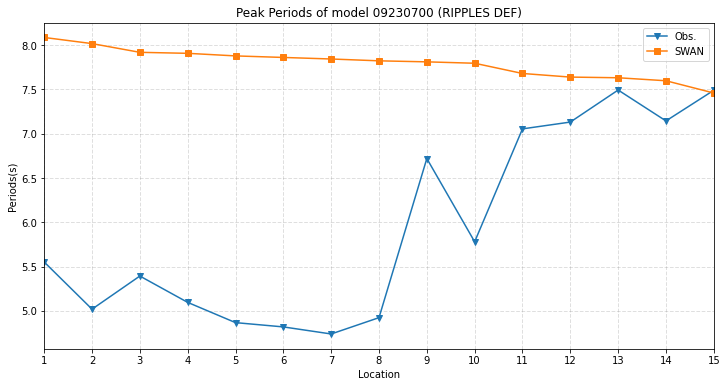

######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######


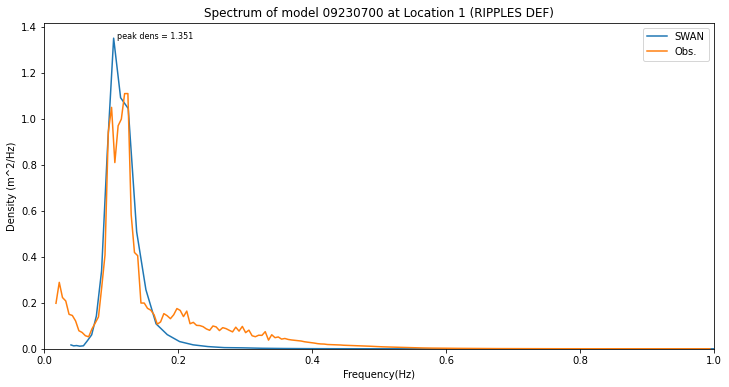

In [5]:
for i in model_types:
    type_dir = os.path.join(my_dir,i)
    model0 = os.listdir(type_dir)
    #print(model0[0])
    #print(pd.read_excel(os.path.join(type_dir,model0[0]) + "\\" + model0[0][6:] + "_Default_Model_Results.xlsx"))
    for j in enumerate(model0):
        do = Compare_Models_Outputs()
        model_date = do.create_df(model0, type_dir, j[0])
        print("######## HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 HM0 #######")
        do.Hm0(savefig=True, savedir=os.path.join(save_dir, model_date[j[0]][6:]))
        print("######## T02 T02 T02 T02 T02 T02 T02 T02 T02 #######")
        do.T02(savefig=True, savedir=os.path.join(save_dir, model_date[j[0]][6:]))
        print("######## SPECTRUM SPECTRUM SPECTRUM SPECTRUM SPECTRUM #######")
        do.spectra(savefig=True, savedir=os.path.join(save_dir, model_date[j[0]][6:]))
    #os.chdir(os.path.join(type_dir, j))
    #print(glob.glob("*.xlsx")[0])